In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os

PROCESS RAW DATA

In [58]:
file_path = "benchmark_raw_results.csv"  # replace with your file path
agg_df = pd.read_csv(file_path, sep=';')

# Replace comma with dot for numeric columns and convert to float
numeric_cols = ['execution_time_ms', 'memory_usage_mb']
for col in numeric_cols:
    agg_df[col] = agg_df[col].str.replace(',', '.').astype(float)

agg_df

,run_id,matrix_size,sparse_level_percent,implementation,execution_time_ms,memory_usage_mb,repetition,timestamp,warm-up,notes
0,run_40daf4db,64,0,unoptimized,2.902,0.960,1,2025-11-11T01:44:10.0998009,1,No notes
1,run_c224400d,64,0,unoptimized,0.647,0.160,2,2025-11-11T01:44:10.1156902,1,No notes
2,run_9e1b7a82,64,0,unoptimized,0.655,0.041,3,2025-11-11T01:44:10.1156902,1,No notes
3,run_36a4f3b6,64,0,unoptimized,0.325,0.028,4,2025-11-11T01:44:10.1355367,1,No notes
4,run_1d641282,64,0,unoptimized,0.343,0.019,5,2025-11-11T01:44:10.1355367,1,No notes
...,...,...,...,...,...,...,...,...,...,...
895,run_516f8b30,2048,95,optimized-strassen,7875.719,143.114,11,2025-11-11T03:37:15.0360955,0,No notes
896,run_ec2370ec,2048,95,optimized-strassen,7894.644,143.231,12,2025-11-11T03:37:23.0219626,0,No notes
897,run_13d3d90c,2048,95,optimized-strassen,7856.022,143.114,13,2025-11-11T03:37:31.0459668,0,No notes
898,run_e4c69a4c,2048,95,optimized-strassen,7888.960,143.165,14,2025-11-11T03:37:38.9951012,0,No notes


In [59]:
agg_df = agg_df[agg_df['warm-up'] != 1]

columns_to_drop = ['run_id', 'timestamp', 'warm-up', 'notes']
agg_df = agg_df.drop(columns=columns_to_drop)

agg_df.to_csv('benchmark_cleaned_results.csv', index=False, sep=';')

print("Data cleaned and saved to 'benchark_cleaned_results.csv'.")
agg_df

Data cleaned and saved to 'benchark_cleaned_results.csv'.


,matrix_size,sparse_level_percent,implementation,execution_time_ms,memory_usage_mb,repetition
5,64,0,unoptimized,0.213,0.027,6
6,64,0,unoptimized,0.163,0.019,7
7,64,0,unoptimized,0.194,0.020,8
8,64,0,unoptimized,0.186,0.019,9
9,64,0,unoptimized,0.313,0.021,10
...,...,...,...,...,...,...
895,2048,95,optimized-strassen,7875.719,143.114,11
896,2048,95,optimized-strassen,7894.644,143.231,12
897,2048,95,optimized-strassen,7856.022,143.114,13
898,2048,95,optimized-strassen,7888.960,143.165,14


In [60]:
agg_df['execution_time_ms'] = pd.to_numeric(agg_df['execution_time_ms'].astype(str).str.replace(',', '.'), errors='coerce')
agg_df['memory_usage_mb'] = pd.to_numeric(agg_df['memory_usage_mb'].astype(str).str.replace(',', '.'), errors='coerce')

# Define the grouping columns
group_cols = ['matrix_size', 'sparse_level_percent', 'implementation']

# Aggregation dictionary
agg_dict = {
    'execution_time_ms': ['mean', 'median', 'std'],
    'memory_usage_mb': ['mean', 'median', 'std']
}

# Perform the aggregation
agg_df = agg_df.groupby(group_cols).agg(agg_dict).reset_index()

# Flatten MultiIndex columns
agg_df.columns = ['_'.join(filter(None, col)).rstrip('_') for col in agg_df.columns.values]

# Save to CSV
agg_df.to_csv('benchmark_aggregated_results.csv', index=False, sep=';')

print("Aggregated data saved to 'benchark_aggregated_results.csv'.")

Aggregated data saved to 'benchark_aggregated_results.csv'.


In [61]:
agg_df

,matrix_size,sparse_level_percent,implementation,execution_time_ms_mean,execution_time_ms_median,execution_time_ms_std,memory_usage_mb_mean,memory_usage_mb_median,memory_usage_mb_std
0,64,0,optimized-strassen,0.4114,0.4110,0.024254,0.0191,0.0180,0.001729
1,64,0,unoptimized,0.2332,0.2035,0.066601,0.0215,0.0215,0.002273
2,64,50,optimized-strassen,0.4102,0.4105,0.026782,0.0180,0.0180,0.000000
3,64,50,unoptimized,0.2511,0.2670,0.057976,0.0220,0.0220,0.000000
4,64,75,optimized-strassen,0.3866,0.3935,0.036136,0.0220,0.0180,0.012649
5,64,75,unoptimized,0.4135,0.4750,0.121976,0.0220,0.0220,0.000000
6,64,90,optimized-strassen,0.4112,0.3890,0.075306,0.0180,0.0180,0.000000
7,64,90,unoptimized,0.4517,0.4800,0.047696,0.0220,0.0220,0.000000
8,64,95,optimized-strassen,0.3888,0.3835,0.018268,0.0180,0.0180,0.000000
9,64,95,unoptimized,0.3720,0.3730,0.010583,0.0220,0.0220,0.000000


GENERATE GRAPHS

In [62]:
def plot_lines(x: list, y: list, file_name: str, labels: list[str], title: str, xlabel: str, ylabel: str, figsize=(8,5), markers=True):
    """
    Plot multiple lines on a single graph with x values as ticks, and save it to a file.

    Parameters:
        x (list): X-axis values
        y (list of lists): Each inner list is a line's Y-axis values
        labels (list of str): Labels for each line
        title (str): Graph title
        xlabel (str): X-axis label
        ylabel (str): Y-axis label
        figsize (tuple, optional): Figure size
        markers (bool, optional): Show markers on data points
        file_name (str): Name of the file to save the plot in './graphs'
    """
    plt.figure(figsize=figsize)

    # Plot each line
    for i, y_values in enumerate(y):
        label = labels[i] if labels is not None else f"Line {i+1}"
        if markers:
            plt.plot(x, y_values, marker='o', label=label)
        else:
            plt.plot(x, y_values, label=label)

    # Set x-axis ticks to match x values
    plt.xticks(x, x, rotation=45)

    plt.grid(True, linestyle='--', alpha=0.5)
    if labels:
        plt.legend()
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

    plt.tight_layout()

    # Save plot
    os.makedirs('./graphs', exist_ok=True)
    full_path = os.path.join('./graphs', file_name)
    plt.savefig(full_path)
    print(f"Plot saved to {full_path}")

    plt.show()

In [63]:
sizes = [64, 128, 256, 512, 1024, 2048]
sparsities = [0, 50, 75, 90, 95]

Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) times: [0.4114, 3.7954999999999997, 20.8591, 153.722, 1117.9698, 7898.6682]
Unoptimized times: [0.2332, 3.1997, 28.9613, 393.872, 4136.8892, 76819.5566]
Plot saved to ./graphs\execution_time_sparsity0.png


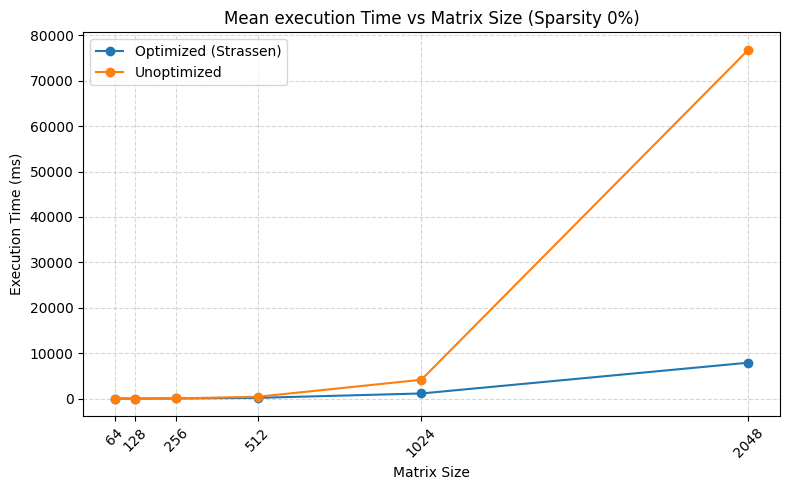

In [64]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size to ensure correct order
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract execution times
optimized_times = df_sparsity0[df_sparsity0['implementation'] == 'optimized-strassen']['execution_time_ms_mean'].tolist()
unoptimized_times = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['execution_time_ms_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) times:", optimized_times)
print("Unoptimized times:", unoptimized_times)

plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Mean execution Time vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='execution_time_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) median times: [0.41100000000000003, 3.707, 20.8945, 156.46800000000002, 1117.8325, 7897.2925]
Unoptimized median times: [0.20350000000000001, 3.0825, 25.8965, 396.3, 4038.8, 76681.885]
Plot saved to ./graphs\median_execution_time_sparsity0.png


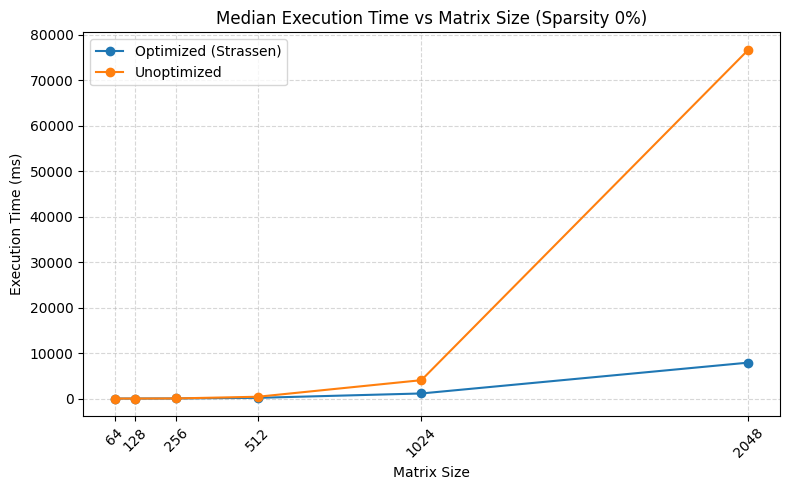

In [65]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size to ensure correct order
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract median execution times
optimized_times = df_sparsity0[df_sparsity0['implementation'] == 'optimized-strassen']['execution_time_ms_median'].tolist()
unoptimized_times = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['execution_time_ms_median'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median times:", optimized_times)
print("Unoptimized median times:", unoptimized_times)

# Plot median execution times
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Median Execution Time vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='median_execution_time_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) std: [0.024254209256676797, 0.2820942513889048, 1.0162750557250182, 5.908484107150026, 5.499481082591139, 38.45664517869453]
Unoptimized std: [0.06660130128858845, 0.35316286768445954, 6.254205608139927, 13.064731778511351, 239.7040833411063, 3731.4743760723427]
Plot saved to ./graphs\execution_time_std_sparsity0.png


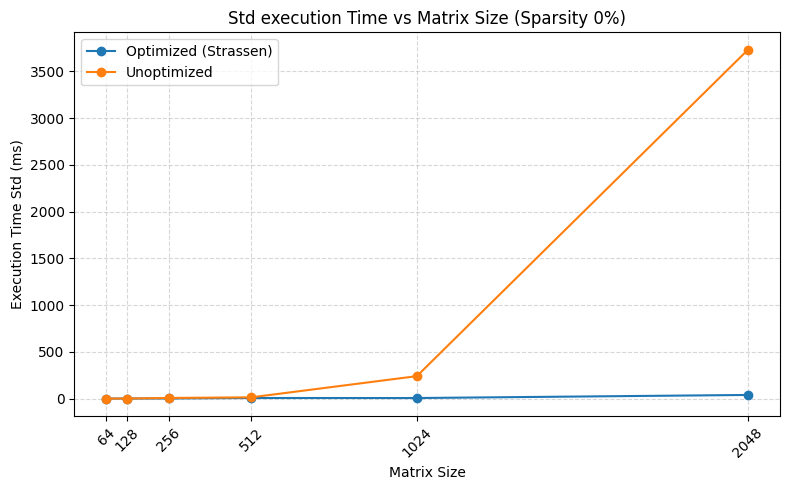

In [66]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size to ensure correct order
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Extract execution time standard deviations
optimized_std = df_sparsity0[df_sparsity0['implementation'] == 'optimized-strassen']['execution_time_ms_std'].tolist()
unoptimized_std = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['execution_time_ms_std'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) std:", optimized_std)
print("Unoptimized std:", unoptimized_std)

# Plot execution time standard deviations
plot_lines(
    x=sizes,
    y=[optimized_std, unoptimized_std],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Std execution Time vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Execution Time Std (ms)',
    file_name='execution_time_std_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) times: [0.4102, 3.0496, 21.1831, 157.0519, 1121.8887, 7878.7592]
Unoptimized times: [0.2511, 3.0673000000000004, 27.9823, 399.4654, 4165.1474, 76791.2314]
Plot saved to ./graphs\execution_time_sparsity50.png


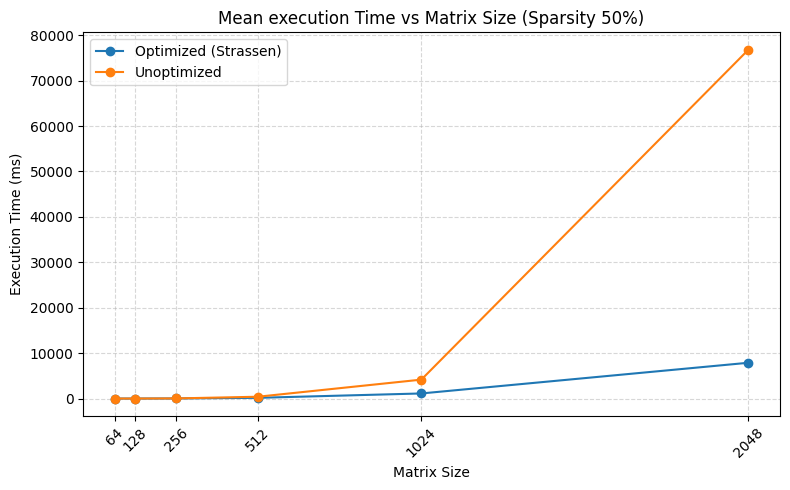

In [67]:
# Filter for sparsity 50
df_sparsity50 = agg_df[agg_df['sparse_level_percent'] == 50]

# Sort by matrix size to ensure correct order
df_sparsity50 = df_sparsity50.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity50['matrix_size'].unique().tolist()

# Extract execution times
optimized_times = df_sparsity50[df_sparsity50['implementation'] == 'optimized-strassen']['execution_time_ms_mean'].tolist()
unoptimized_times = df_sparsity50[df_sparsity50['implementation'] == 'unoptimized']['execution_time_ms_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) times:", optimized_times)
print("Unoptimized times:", unoptimized_times)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Mean execution Time vs Matrix Size (Sparsity 50%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='execution_time_sparsity50.png'
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) median times: [0.4105, 3.0365, 21.2295, 156.86849999999998, 1118.1709999999998, 7878.3695]
Unoptimized median times: [0.267, 3.005, 24.0125, 400.95799999999997, 4051.9660000000003, 76343.3615]
Plot saved to ./graphs\execution_time_sparsity50_median.png


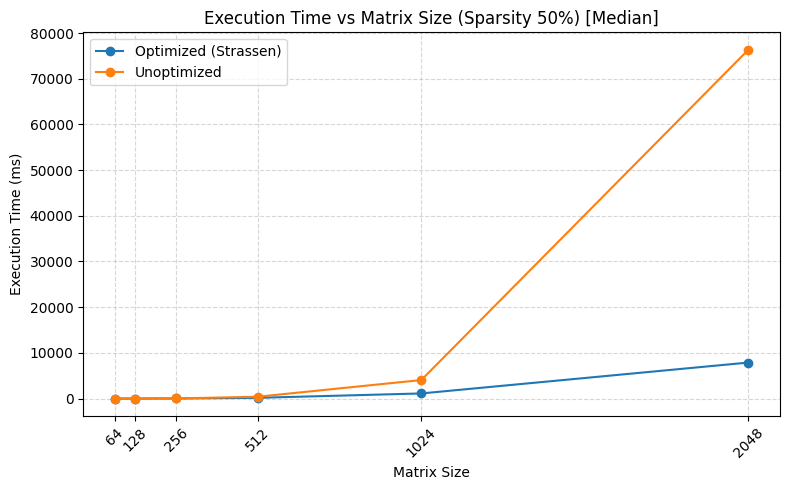

In [68]:
# Filter for sparsity 50
df_sparsity50 = agg_df[agg_df['sparse_level_percent'] == 50]

# Sort by matrix size to ensure correct order
df_sparsity50 = df_sparsity50.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity50['matrix_size'].unique().tolist()

# Extract execution times using median
optimized_times = df_sparsity50[df_sparsity50['implementation'] == 'optimized-strassen']['execution_time_ms_median'].tolist()
unoptimized_times = df_sparsity50[df_sparsity50['implementation'] == 'unoptimized']['execution_time_ms_median'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median times:", optimized_times)
print("Unoptimized median times:", unoptimized_times)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Execution Time vs Matrix Size (Sparsity 50%) [Median]',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='execution_time_sparsity50_median.png'
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) execution time std: [0.026782249511362717, 0.23867094968223976, 0.42543401368484857, 3.0844939599371703, 9.268289007266688, 25.1069974345357]
Unoptimized execution time std: [0.05797595286936741, 0.21567261712553545, 6.514896844923947, 10.872221639470819, 301.5779076937394, 3944.078843612208]
Plot saved to ./graphs\execution_time_std_sparsity50.png


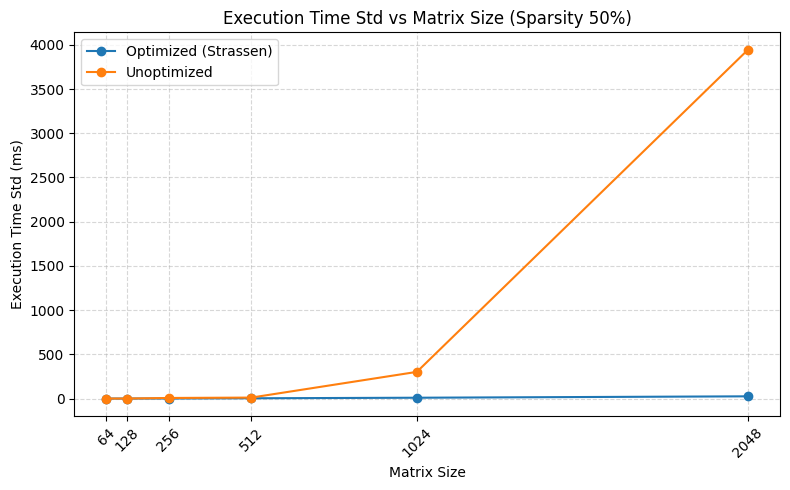

In [69]:
# Filter for sparsity 50
df_sparsity50 = agg_df[agg_df['sparse_level_percent'] == 50]

# Sort by matrix size to ensure correct order
df_sparsity50 = df_sparsity50.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity50['matrix_size'].unique().tolist()

# Extract execution time standard deviations
optimized_std = df_sparsity50[df_sparsity50['implementation'] == 'optimized-strassen']['execution_time_ms_std'].tolist()
unoptimized_std = df_sparsity50[df_sparsity50['implementation'] == 'unoptimized']['execution_time_ms_std'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) execution time std:", optimized_std)
print("Unoptimized execution time std:", unoptimized_std)

# Plot the standard deviations
plot_lines(
    x=sizes,
    y=[optimized_std, unoptimized_std],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Execution Time Std vs Matrix Size (Sparsity 50%)',
    xlabel='Matrix Size',
    ylabel='Execution Time Std (ms)',
    file_name='execution_time_std_sparsity50.png'
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) times: [0.3866, 2.8403, 20.4711, 154.0698, 1124.0824, 7892.296700000001]
Unoptimized times: [0.4135, 3.1365000000000003, 28.0899, 393.9126, 3832.5281999999997, 76635.4973]
Plot saved to ./graphs\execution_time_sparsity75.png


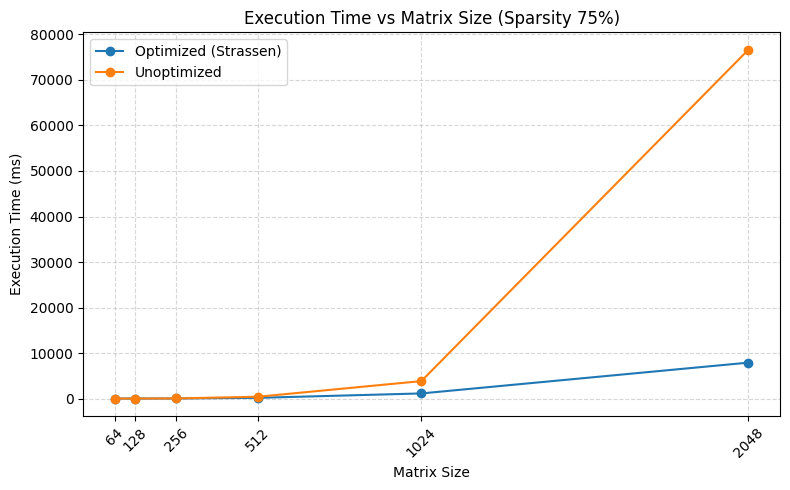

In [70]:
# Filter for sparsity 75
df_sparsity75 = agg_df[agg_df['sparse_level_percent'] == 75]

# Sort by matrix size to ensure correct order
df_sparsity75 = df_sparsity75.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity75['matrix_size'].unique().tolist()

# Extract execution times for each implementation
optimized_times = df_sparsity75[df_sparsity75['implementation'] == 'optimized-strassen']['execution_time_ms_mean'].tolist()
unoptimized_times = df_sparsity75[df_sparsity75['implementation'] == 'unoptimized']['execution_time_ms_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) times:", optimized_times)
print("Unoptimized times:", unoptimized_times)

# Plot
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Execution Time vs Matrix Size (Sparsity 75%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='execution_time_sparsity75.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) median times: [0.3935, 2.8215000000000003, 20.1435, 154.99450000000002, 1117.009, 7889.333500000001]
Unoptimized median times: [0.475, 3.1100000000000003, 27.4225, 395.66949999999997, 3834.3244999999997, 75263.987]
Plot saved to ./graphs\execution_time_sparsity75_median.png


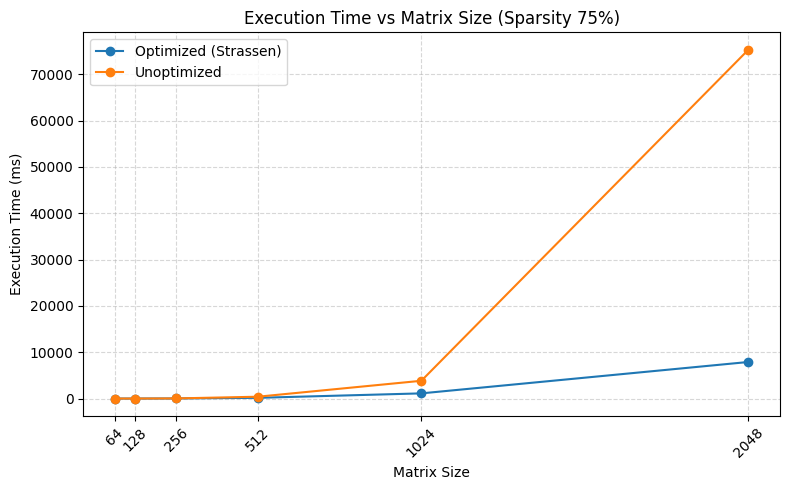

In [71]:
# Filter for sparsity 75
df_sparsity75 = agg_df[agg_df['sparse_level_percent'] == 75]

# Sort by matrix size to ensure correct order
df_sparsity75 = df_sparsity75.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity75['matrix_size'].unique().tolist()

# Extract execution times (median)
optimized_times = df_sparsity75[df_sparsity75['implementation'] == 'optimized-strassen']['execution_time_ms_median'].tolist()
unoptimized_times = df_sparsity75[df_sparsity75['implementation'] == 'unoptimized']['execution_time_ms_median'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median times:", optimized_times)
print("Unoptimized median times:", unoptimized_times)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Execution Time vs Matrix Size (Sparsity 75%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='execution_time_sparsity75_median.png'
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) execution time std: [0.036136162250884125, 0.07019979423838152, 0.8956774531046321, 5.662148233861608, 17.655647829141493, 19.52433791194967]
Unoptimized execution time std: [0.12197563508978157, 0.22095914655076956, 5.495313931988883, 5.982685929691895, 126.6554606664167, 4552.008547382819]
Plot saved to ./graphs\execution_time_std_sparsity75.png


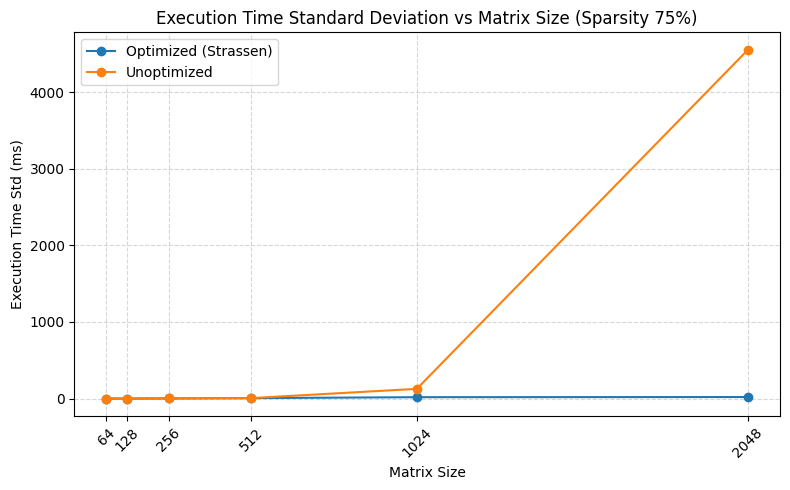

In [72]:
# Filter for sparsity 75
df_sparsity75 = agg_df[agg_df['sparse_level_percent'] == 75]

# Sort by matrix size to ensure correct order
df_sparsity75 = df_sparsity75.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity75['matrix_size'].unique().tolist()

# Extract execution time standard deviations
optimized_std = df_sparsity75[df_sparsity75['implementation'] == 'optimized-strassen']['execution_time_ms_std'].tolist()
unoptimized_std = df_sparsity75[df_sparsity75['implementation'] == 'unoptimized']['execution_time_ms_std'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) execution time std:", optimized_std)
print("Unoptimized execution time std:", unoptimized_std)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_std, unoptimized_std],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Execution Time Standard Deviation vs Matrix Size (Sparsity 75%)',
    xlabel='Matrix Size',
    ylabel='Execution Time Std (ms)',
    file_name='execution_time_std_sparsity75.png'
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) times: [0.4112, 2.8818, 20.232599999999998, 155.8544, 1120.9665, 7903.688899999999]
Unoptimized times: [0.45169999999999993, 3.0342, 28.2557, 391.96590000000003, 3737.2101000000002, 77251.8491]
Plot saved to ./graphs\execution_time_sparsity90.png


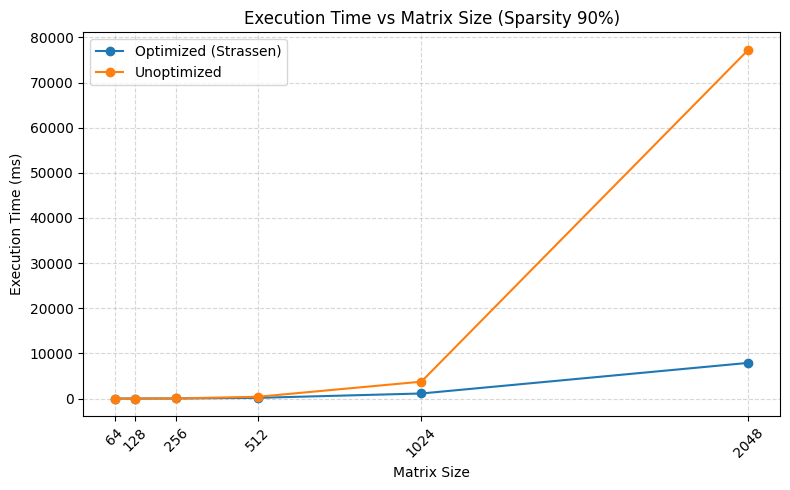

In [73]:
# Filter for sparsity 90
df_sparsity90 = agg_df[agg_df['sparse_level_percent'] == 90]

# Sort by matrix size to ensure correct order
df_sparsity90 = df_sparsity90.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity90['matrix_size'].unique().tolist()

# Extract execution times for each implementation
optimized_times = df_sparsity90[df_sparsity90['implementation'] == 'optimized-strassen']['execution_time_ms_mean'].tolist()
unoptimized_times = df_sparsity90[df_sparsity90['implementation'] == 'unoptimized']['execution_time_ms_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) times:", optimized_times)
print("Unoptimized times:", unoptimized_times)

# Plot
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Execution Time vs Matrix Size (Sparsity 90%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='execution_time_sparsity90.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) median times: [0.389, 2.8105, 19.859499999999997, 155.3665, 1116.7775, 7899.7195]
Unoptimized median times: [0.48, 2.99, 25.302500000000002, 393.5235, 3706.352, 77414.45749999999]
Plot saved to ./graphs\execution_time_median_sparsity90.png


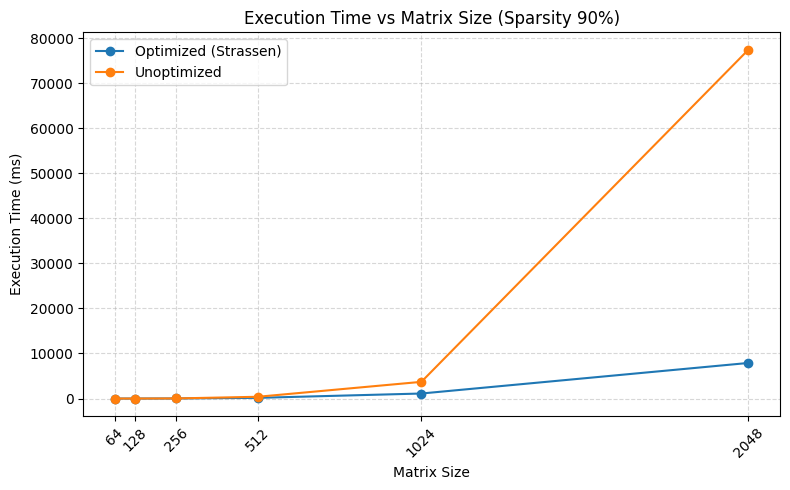

In [74]:
# Filter for sparsity 90
df_sparsity90 = agg_df[agg_df['sparse_level_percent'] == 90]

# Sort by matrix size to ensure correct order
df_sparsity90 = df_sparsity90.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity90['matrix_size'].unique().tolist()

# Extract execution time median
optimized_times_median = df_sparsity90[df_sparsity90['implementation'] == 'optimized-strassen']['execution_time_ms_median'].tolist()
unoptimized_times_median = df_sparsity90[df_sparsity90['implementation'] == 'unoptimized']['execution_time_ms_median'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median times:", optimized_times_median)
print("Unoptimized median times:", unoptimized_times_median)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_times_median, unoptimized_times_median],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Execution Time vs Matrix Size (Sparsity 90%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='execution_time_median_sparsity90.png'
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) execution time std: [0.07530648489118758, 0.17016906625797512, 0.8451683855895228, 3.779274715838709, 13.159535885517474, 29.900744340233498]
Unoptimized execution time std: [0.04769591177449069, 0.22941316439995318, 6.210108391431936, 10.225407108983205, 80.83132132540648, 4419.755398502887]
Plot saved to ./graphs\execution_time_std_sparsity90.png


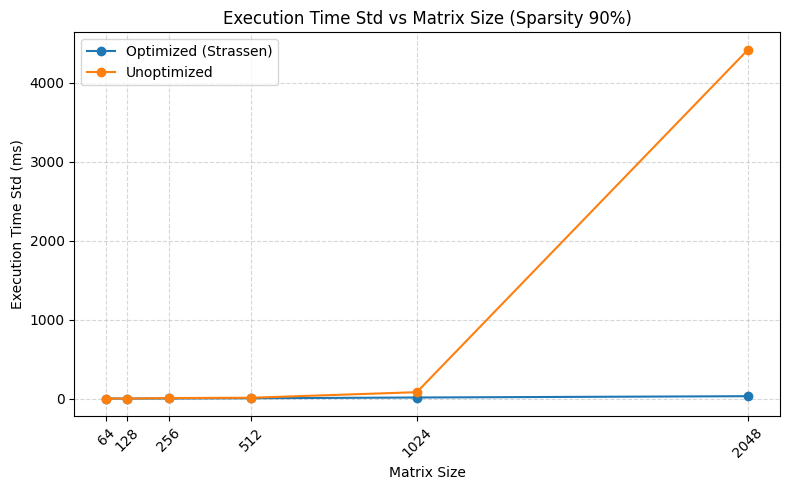

In [75]:
# Filter for sparsity 90
df_sparsity90 = agg_df[agg_df['sparse_level_percent'] == 90]

# Sort by matrix size to ensure correct order
df_sparsity90 = df_sparsity90.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity90['matrix_size'].unique().tolist()

# Extract execution time std
optimized_std = df_sparsity90[df_sparsity90['implementation'] == 'optimized-strassen']['execution_time_ms_std'].tolist()
unoptimized_std = df_sparsity90[df_sparsity90['implementation'] == 'unoptimized']['execution_time_ms_std'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) execution time std:", optimized_std)
print("Unoptimized execution time std:", unoptimized_std)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_std, unoptimized_std],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Execution Time Std vs Matrix Size (Sparsity 90%)',
    xlabel='Matrix Size',
    ylabel='Execution Time Std (ms)',
    file_name='execution_time_std_sparsity90.png'
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) times: [0.3888, 2.8026, 20.0054, 155.1057, 1118.1167, 7890.566000000001]
Unoptimized times: [0.372, 3.1853000000000002, 28.6959, 401.5502, 3780.0262000000002, 76658.5013]
Plot saved to ./graphs\execution_time_sparsity95.png


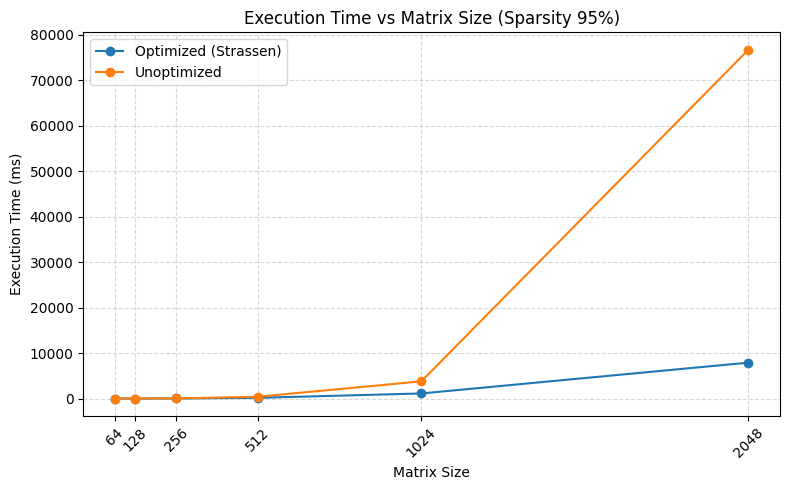

In [76]:
# Filter for sparsity 95
df_sparsity95 = agg_df[agg_df['sparse_level_percent'] == 95]

# Sort by matrix size to ensure correct order
df_sparsity95 = df_sparsity95.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity95['matrix_size'].unique().tolist()

# Extract execution times
optimized_times = df_sparsity95[df_sparsity95['implementation'] == 'optimized-strassen']['execution_time_ms_mean'].tolist()
unoptimized_times = df_sparsity95[df_sparsity95['implementation'] == 'unoptimized']['execution_time_ms_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) times:", optimized_times)
print("Unoptimized times:", unoptimized_times)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Execution Time vs Matrix Size (Sparsity 95%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='execution_time_sparsity95.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) median times: [0.3835, 2.784, 19.627000000000002, 154.86, 1117.9785, 7884.439]
Unoptimized median times: [0.373, 3.1915, 28.4615, 399.53049999999996, 3720.8940000000002, 76850.8855]
Plot saved to ./graphs\execution_time_sparsity95_median.png


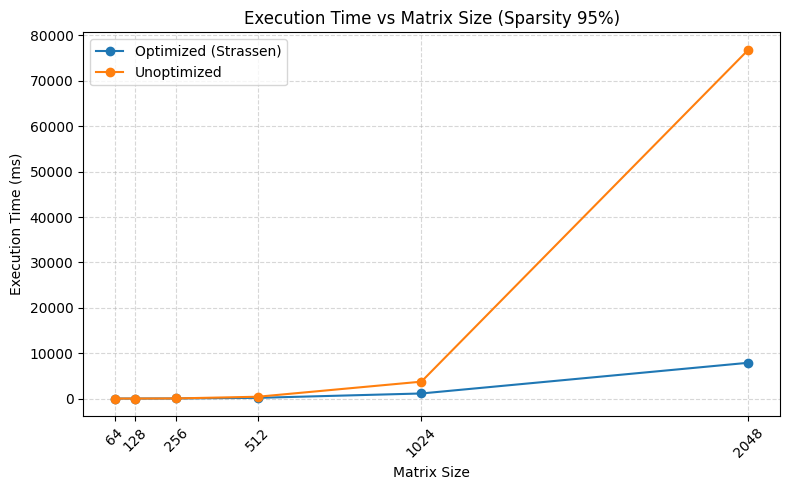

In [77]:
# Filter for sparsity 95
df_sparsity95 = agg_df[agg_df['sparse_level_percent'] == 95]

# Sort by matrix size to ensure correct order
df_sparsity95 = df_sparsity95.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity95['matrix_size'].unique().tolist()

# Extract execution times (median)
optimized_times = df_sparsity95[df_sparsity95['implementation'] == 'optimized-strassen']['execution_time_ms_median'].tolist()
unoptimized_times = df_sparsity95[df_sparsity95['implementation'] == 'unoptimized']['execution_time_ms_median'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median times:", optimized_times)
print("Unoptimized median times:", unoptimized_times)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Execution Time vs Matrix Size (Sparsity 95%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='execution_time_sparsity95_median.png'
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) memory usage std: [0.0, 0.0, 0.0, 0.5049627489011221, 0.17503320319934113, 0.09225718881956115]
Unoptimized memory usage std: [0.0, 0.0, 0.0, 0.2709772438170162, 0.8679243438610685, 0.7624813950371364]
Plot saved to ./graphs\memory_usage_std_sparsity95.png


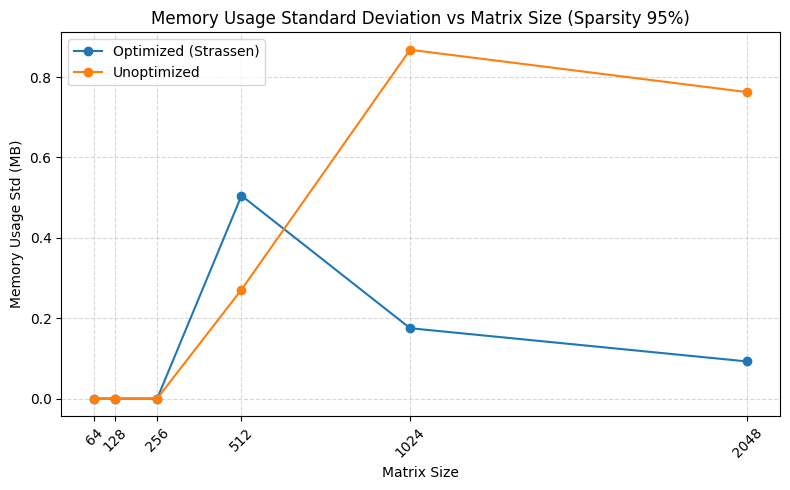

In [78]:
# Filter for sparsity 95
df_sparsity95 = agg_df[agg_df['sparse_level_percent'] == 95]

# Sort by matrix size to ensure correct order
df_sparsity95 = df_sparsity95.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity95['matrix_size'].unique().tolist()

# Extract memory usage standard deviation
optimized_memory_std = df_sparsity95[df_sparsity95['implementation'] == 'optimized-strassen']['memory_usage_mb_std'].tolist()
unoptimized_memory_std = df_sparsity95[df_sparsity95['implementation'] == 'unoptimized']['memory_usage_mb_std'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage std:", optimized_memory_std)
print("Unoptimized memory usage std:", unoptimized_memory_std)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_memory_std, unoptimized_memory_std],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Memory Usage Standard Deviation vs Matrix Size (Sparsity 95%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_usage_std_sparsity95.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.4114, 0.4102, 0.3866, 0.4112, 0.3888]
Matrix size 128: [3.7954999999999997, 3.0496, 2.8403, 2.8818, 2.8026]
Matrix size 256: [20.8591, 21.1831, 20.4711, 20.232599999999998, 20.0054]
Matrix size 512: [153.722, 157.0519, 154.0698, 155.8544, 155.1057]
Matrix size 1024: [1117.9698, 1121.8887, 1124.0824, 1120.9665, 1118.1167]
Matrix size 2048: [7898.6682, 7878.7592, 7892.296700000001, 7903.688899999999, 7890.566000000001]
Plot saved to ./graphs\optimized_execution_vs_sparsity.png


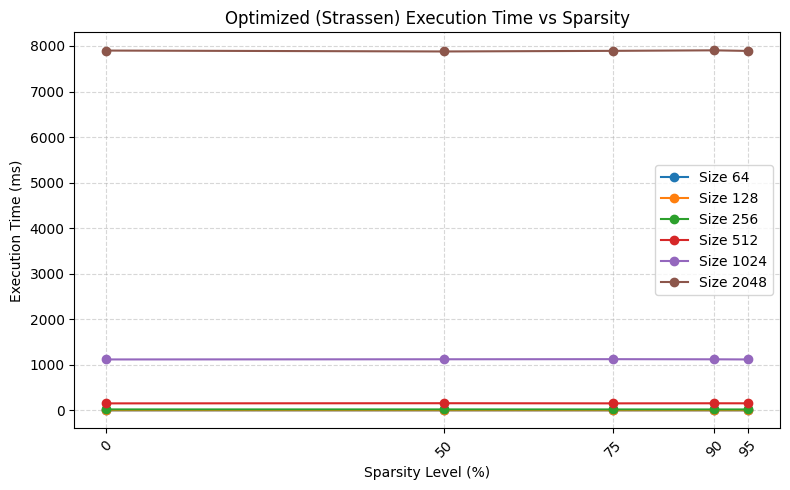

In [79]:
# Filter only optimized-strassen implementation
df_opt = agg_df[agg_df['implementation'] == 'optimized-strassen']

# Sort by matrix size and sparsity for consistent plotting
df_opt = df_opt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_opt['matrix_size'].unique().tolist()

# Prepare data for each matrix size
y_values = []
for size in matrix_sizes:
    subset = df_opt[df_opt['matrix_size'] == size]
    y_values.append(subset['execution_time_ms_mean'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Optimized (Strassen) Execution Time vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Execution Time (ms)',
    file_name='optimized_execution_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.41100000000000003, 0.4105, 0.3935, 0.389, 0.3835]
Matrix size 128: [3.707, 3.0365, 2.8215000000000003, 2.8105, 2.784]
Matrix size 256: [20.8945, 21.2295, 20.1435, 19.859499999999997, 19.627000000000002]
Matrix size 512: [156.46800000000002, 156.86849999999998, 154.99450000000002, 155.3665, 154.86]
Matrix size 1024: [1117.8325, 1118.1709999999998, 1117.009, 1116.7775, 1117.9785]
Matrix size 2048: [7897.2925, 7878.3695, 7889.333500000001, 7899.7195, 7884.439]
Plot saved to ./graphs\optimized_median_execution_vs_sparsity.png


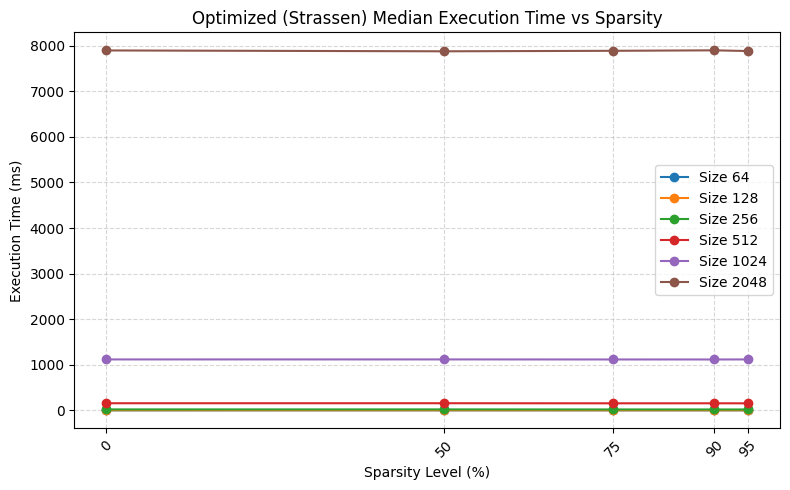

In [80]:
# Filter only optimized-strassen implementation
df_opt = agg_df[agg_df['implementation'] == 'optimized-strassen']

# Sort by matrix size and sparsity for consistent plotting
df_opt = df_opt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all sparsity levels
sparsities = df_opt['sparse_level_percent'].unique().tolist()

# Get all matrix sizes
matrix_sizes = df_opt['matrix_size'].unique().tolist()

# Prepare data for each matrix size using median execution time
y_values = []
for size in matrix_sizes:
    subset = df_opt[df_opt['matrix_size'] == size]
    y_values.append(subset['execution_time_ms_median'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Optimized (Strassen) Median Execution Time vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Execution Time (ms)',
    file_name='optimized_median_execution_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64 (std): [0.024254209256676797, 0.026782249511362717, 0.036136162250884125, 0.07530648489118758, 0.018268369750290617]
Matrix size 128 (std): [0.2820942513889048, 0.23867094968223976, 0.07019979423838152, 0.17016906625797512, 0.056952611880404465]
Matrix size 256 (std): [1.0162750557250182, 0.42543401368484857, 0.8956774531046321, 0.8451683855895228, 0.7067083635497103]
Matrix size 512 (std): [5.908484107150026, 3.0844939599371703, 5.662148233861608, 3.779274715838709, 3.3173786857162444]
Matrix size 1024 (std): [5.499481082591139, 9.268289007266688, 17.655647829141493, 13.159535885517474, 4.31737466652024]
Matrix size 2048 (std): [38.45664517869453, 25.1069974345357, 19.52433791194967, 29.900744340233498, 24.031482286552563]
Plot saved to ./graphs\optimized_execution_std_vs_sparsity.png


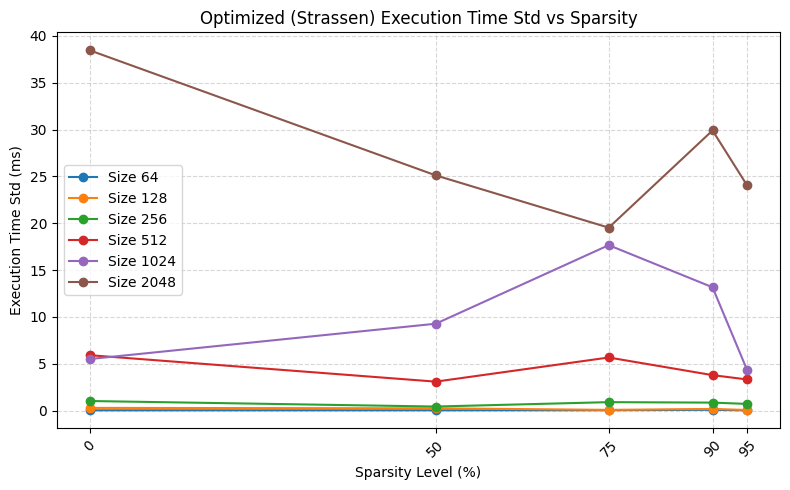

In [81]:
# Filter only optimized-strassen implementation
df_opt = agg_df[agg_df['implementation'] == 'optimized-strassen']

# Sort by matrix size and sparsity for consistent plotting
df_opt = df_opt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_opt['matrix_size'].unique().tolist()
sparsities = df_opt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size (using standard deviation)
y_values = []
for size in matrix_sizes:
    subset = df_opt[df_opt['matrix_size'] == size]
    y_values.append(subset['execution_time_ms_std'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size} (std): {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Optimized (Strassen) Execution Time Std vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Execution Time Std (ms)',
    file_name='optimized_execution_std_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.2332, 0.2511, 0.4135, 0.45169999999999993, 0.372]
Matrix size 128: [3.1997, 3.0673000000000004, 3.1365000000000003, 3.0342, 3.1853000000000002]
Matrix size 256: [28.9613, 27.9823, 28.0899, 28.2557, 28.6959]
Matrix size 512: [393.872, 399.4654, 393.9126, 391.96590000000003, 401.5502]
Matrix size 1024: [4136.8892, 4165.1474, 3832.5281999999997, 3737.2101000000002, 3780.0262000000002]
Matrix size 2048: [76819.5566, 76791.2314, 76635.4973, 77251.8491, 76658.5013]
Plot saved to ./graphs\unoptimized_execution_vs_sparsity.png


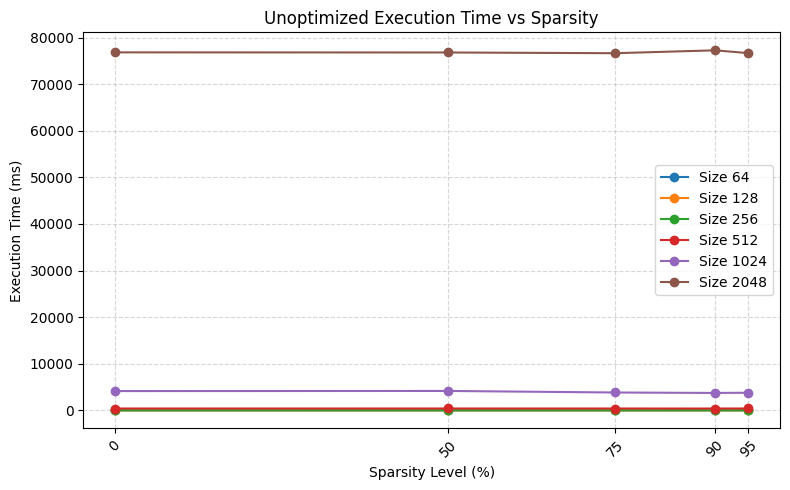

In [82]:
# Filter only unoptimized implementation
df_unopt = agg_df[agg_df['implementation'] == 'unoptimized']

# Sort by matrix size and sparsity for consistent plotting
df_unopt = df_unopt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_unopt['matrix_size'].unique().tolist()
sparsities = df_unopt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size
y_values = []
for size in matrix_sizes:
    subset = df_unopt[df_unopt['matrix_size'] == size]
    y_values.append(subset['execution_time_ms_mean'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Unoptimized Execution Time vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Execution Time (ms)',
    file_name='unoptimized_execution_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.20350000000000001, 0.267, 0.475, 0.48, 0.373]
Matrix size 128: [3.0825, 3.005, 3.1100000000000003, 2.99, 3.1915]
Matrix size 256: [25.8965, 24.0125, 27.4225, 25.302500000000002, 28.4615]
Matrix size 512: [396.3, 400.95799999999997, 395.66949999999997, 393.5235, 399.53049999999996]
Matrix size 1024: [4038.8, 4051.9660000000003, 3834.3244999999997, 3706.352, 3720.8940000000002]
Matrix size 2048: [76681.885, 76343.3615, 75263.987, 77414.45749999999, 76850.8855]
Plot saved to ./graphs\unoptimized_execution_vs_sparsity_median.png


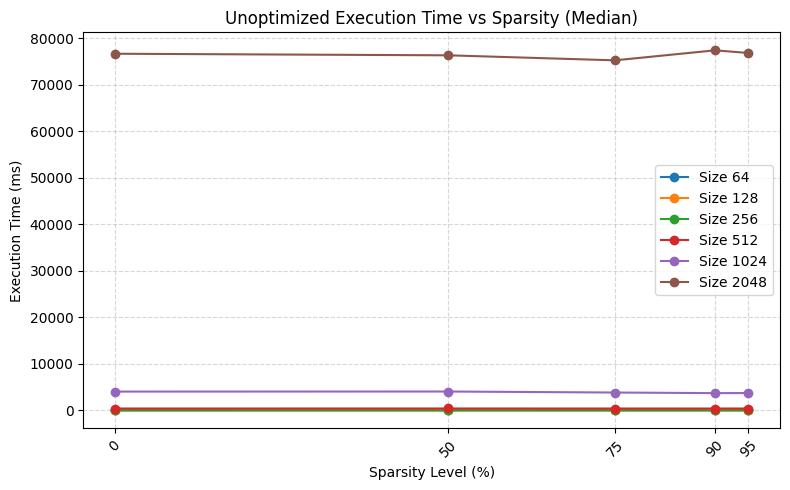

In [83]:
# Filter only unoptimized implementation
df_unopt = agg_df[agg_df['implementation'] == 'unoptimized']

# Sort by matrix size and sparsity for consistent plotting
df_unopt = df_unopt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_unopt['matrix_size'].unique().tolist()
sparsities = df_unopt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size using median execution time
y_values = []
for size in matrix_sizes:
    subset = df_unopt[df_unopt['matrix_size'] == size]
    y_values.append(subset['execution_time_ms_median'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Unoptimized Execution Time vs Sparsity (Median)',
    xlabel='Sparsity Level (%)',
    ylabel='Execution Time (ms)',
    file_name='unoptimized_execution_vs_sparsity_median.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64 std dev: [0.06660130128858845, 0.05797595286936741, 0.12197563508978157, 0.04769591177449069, 0.010583005244258373]
Matrix size 128 std dev: [0.35316286768445954, 0.21567261712553545, 0.22095914655076956, 0.22941316439995318, 0.15785721396249214]
Matrix size 256 std dev: [6.254205608139927, 6.514896844923947, 5.495313931988883, 6.210108391431936, 5.439543597071767]
Matrix size 512 std dev: [13.064731778511351, 10.872221639470819, 5.982685929691895, 10.225407108983205, 8.436503696568993]
Matrix size 1024 std dev: [239.7040833411063, 301.5779076937394, 126.6554606664167, 80.83132132540648, 149.3318825679529]
Matrix size 2048 std dev: [3731.4743760723427, 3944.078843612208, 4552.008547382819, 4419.755398502887, 3887.2277446959265]
Plot saved to ./graphs\unoptimized_execution_std_vs_sparsity.png


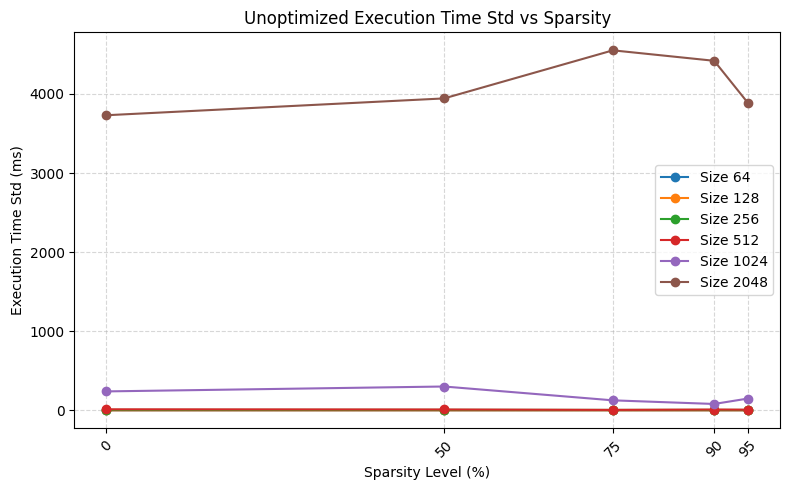

In [84]:
# Filter only unoptimized implementation
df_unopt = agg_df[agg_df['implementation'] == 'unoptimized']

# Sort by matrix size and sparsity for consistent plotting
df_unopt = df_unopt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_unopt['matrix_size'].unique().tolist()
sparsities = df_unopt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size using std instead of mean
y_values = []
for size in matrix_sizes:
    subset = df_unopt[df_unopt['matrix_size'] == size]
    y_values.append(subset['execution_time_ms_std'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size} std dev:", vals)

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Unoptimized Execution Time Std vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Execution Time Std (ms)',
    file_name='unoptimized_execution_std_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.0191, 0.018, 0.022, 0.018, 0.018]
Matrix size 128: [0.30789999999999995, 0.308, 0.308, 0.308, 0.308]
Matrix size 256: [1.4274, 1.426, 1.4270999999999998, 1.426, 1.426]
Matrix size 512: [7.5144, 7.5144, 7.5144, 7.5287999999999995, 7.521599999999999]
Matrix size 1024: [41.1648, 41.2868, 41.4227, 41.3713, 41.3232]
Matrix size 2048: [143.176, 143.1993, 143.1582, 143.2463, 143.1705]
Plot saved to ./graphs\optimized_memory_vs_sparsity.png


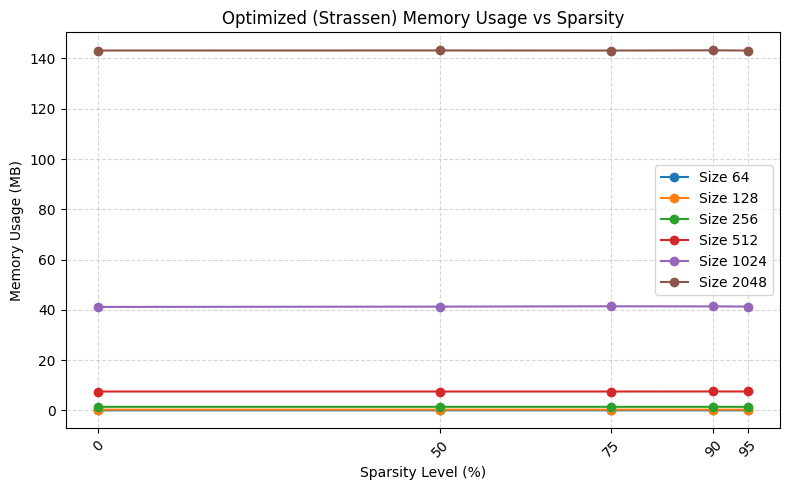

In [85]:
# Filter only optimized-strassen implementation
df_opt = agg_df[agg_df['implementation'] == 'optimized-strassen']

# Sort by matrix size and sparsity for consistent plotting
df_opt = df_opt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_opt['matrix_size'].unique().tolist()
sparsities = df_opt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size
y_values = []
for size in matrix_sizes:
    subset = df_opt[df_opt['matrix_size'] == size]
    y_values.append(subset['memory_usage_mb_mean'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Optimized (Strassen) Memory Usage vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Memory Usage (MB)',
    file_name='optimized_memory_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.018, 0.018, 0.018, 0.018, 0.018]
Matrix size 128: [0.308, 0.308, 0.308, 0.308, 0.308]
Matrix size 256: [1.426, 1.426, 1.426, 1.426, 1.426]
Matrix size 512: [7.536, 7.536, 7.536, 7.536, 7.536]
Matrix size 1024: [41.1135, 41.3245, 41.449, 41.449, 41.449]
Matrix size 2048: [143.1485, 143.1405, 143.1485, 143.13850000000002, 143.13850000000002]
Plot saved to ./graphs\optimized_memory_vs_sparsity_median.png


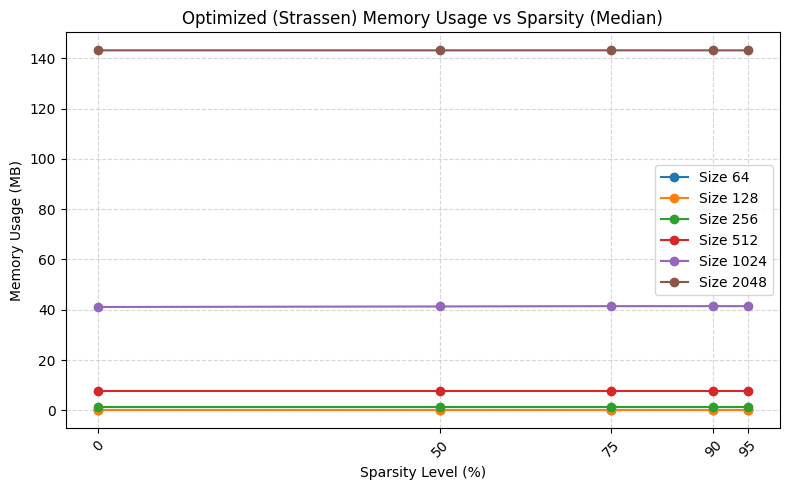

In [86]:
# Filter only optimized-strassen implementation
df_opt = agg_df[agg_df['implementation'] == 'optimized-strassen']

# Sort by matrix size and sparsity for consistent plotting
df_opt = df_opt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_opt['matrix_size'].unique().tolist()
sparsities = df_opt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size using median
y_values = []
for size in matrix_sizes:
    subset = df_opt[df_opt['matrix_size'] == size]
    y_values.append(subset['memory_usage_mb_median'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Optimized (Strassen) Memory Usage vs Sparsity (Median)',
    xlabel='Sparsity Level (%)',
    ylabel='Memory Usage (MB)',
    file_name='optimized_memory_vs_sparsity_median.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.0017288403306519912, 0.0, 0.01264911064067352, 0.0, 0.0]
Matrix size 128: [0.0003162277660168543, 0.0, 0.0, 0.0, 0.0]
Matrix size 256: [0.003777124126457367, 0.0, 0.003478505426185257, 0.0, 0.0]
Matrix size 512: [0.5125420741537008, 0.5125420741537009, 0.5125420741537009, 0.4971520670557228, 0.5049627489011221]
Matrix size 1024: [0.21541732108218026, 0.18372793896290482, 0.17472902830764067, 0.16843531564240113, 0.17503320319934113]
Matrix size 2048: [0.10116213608745246, 0.12069525444044335, 0.06565871356237647, 0.21149733384187122, 0.09225718881956115]
Plot saved to ./graphs\optimized_memory_std_vs_sparsity.png


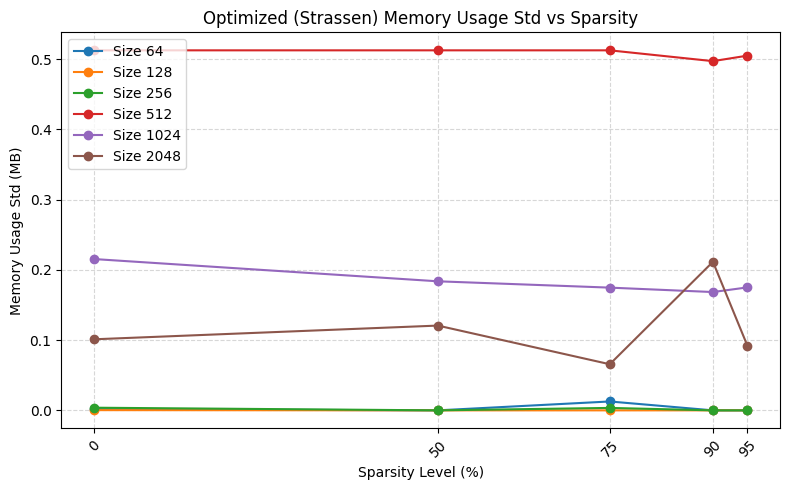

In [87]:
# Filter only optimized-strassen implementation
df_opt = agg_df[agg_df['implementation'] == 'optimized-strassen']

# Sort by matrix size and sparsity for consistent plotting
df_opt = df_opt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_opt['matrix_size'].unique().tolist()
sparsities = df_opt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size (using std instead of mean)
y_values_std = []
for size in matrix_sizes:
    subset = df_opt[df_opt['matrix_size'] == size]
    y_values_std.append(subset['memory_usage_mb_std'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values_std):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values_std,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Optimized (Strassen) Memory Usage Std vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Memory Usage Std (MB)',
    file_name='optimized_memory_std_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.0215, 0.022, 0.022, 0.022, 0.022]
Matrix size 128: [0.0725, 0.0713, 0.0713, 0.071, 0.071]
Matrix size 256: [0.2717, 0.2661, 0.2732, 0.265, 0.265]
Matrix size 512: [1.1581, 1.1948, 1.2432, 1.2117, 1.1960000000000002]
Matrix size 1024: [4.4912, 4.6559, 4.824299999999999, 4.8168999999999995, 4.801]
Matrix size 2048: [17.1923, 16.9831, 17.1265, 17.1261, 17.1261]
Plot saved to ./graphs\unoptimized_memory_vs_sparsity.png


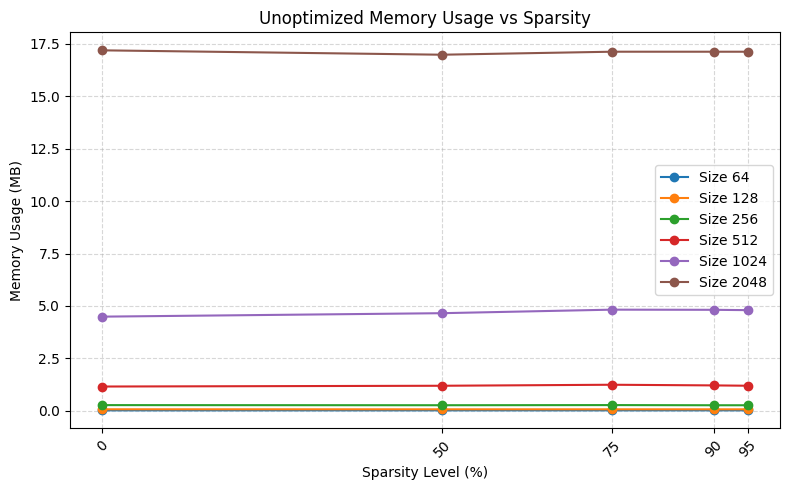

In [88]:
# Filter only unoptimized implementation
df_unopt = agg_df[agg_df['implementation'] == 'unoptimized']

# Sort by matrix size and sparsity for consistent plotting
df_unopt = df_unopt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_unopt['matrix_size'].unique().tolist()
sparsities = df_unopt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size
y_values = []
for size in matrix_sizes:
    subset = df_unopt[df_unopt['matrix_size'] == size]
    y_values.append(subset['memory_usage_mb_mean'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Unoptimized Memory Usage vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Memory Usage (MB)',
    file_name='unoptimized_memory_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.0215, 0.022, 0.022, 0.022, 0.022]
Matrix size 128: [0.0715, 0.071, 0.071, 0.071, 0.071]
Matrix size 256: [0.2685, 0.265, 0.265, 0.265, 0.265]
Matrix size 512: [1.058, 1.079, 1.0835, 1.0635, 1.0870000000000002]
Matrix size 1024: [4.117, 4.086, 4.1985, 4.15, 4.181]
Matrix size 2048: [16.8885, 16.575499999999998, 16.575499999999998, 16.575499999999998, 16.575499999999998]
Plot saved to ./graphs\unoptimized_memory_vs_sparsity_median.png


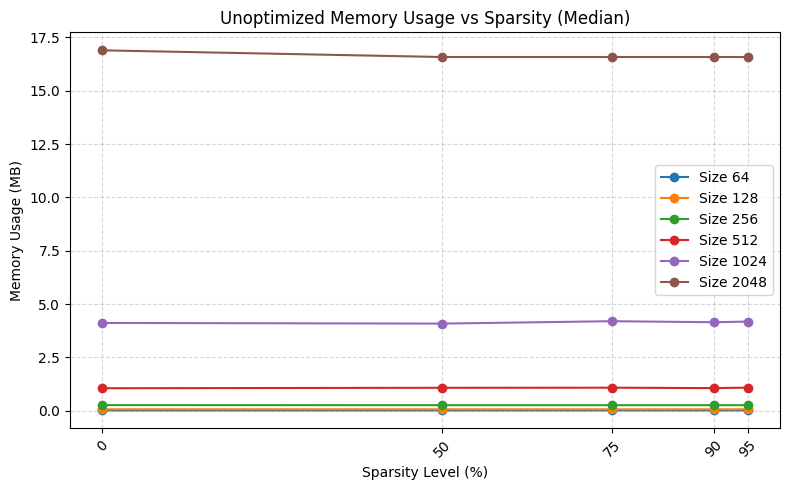

In [89]:
# Filter only unoptimized implementation
df_unopt = agg_df[agg_df['implementation'] == 'unoptimized']

# Sort by matrix size and sparsity for consistent plotting
df_unopt = df_unopt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_unopt['matrix_size'].unique().tolist()
sparsities = df_unopt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size using median memory usage
y_values = []
for size in matrix_sizes:
    subset = df_unopt[df_unopt['matrix_size'] == size]
    y_values.append(subset['memory_usage_mb_median'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Unoptimized Memory Usage vs Sparsity (Median)',
    xlabel='Sparsity Level (%)',
    ylabel='Memory Usage (MB)',
    file_name='unoptimized_memory_vs_sparsity_median.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.0022730302828309753, 0.0, 0.0, 0.0, 0.0]
Matrix size 128: [0.001840893502864545, 0.00048304589153964786, 0.00048304589153964786, 0.0, 0.0]
Matrix size 256: [0.007916929820187728, 0.0034785054261852215, 0.02558558622002282, 0.0, 0.0]
Matrix size 512: [0.22805040865757928, 0.2698084917533587, 0.29429531653312685, 0.2570179630557626, 0.2709772438170162]
Matrix size 1024: [0.7989597125151068, 0.9304482133777127, 0.8773658871873238, 0.9172553806510666, 0.8679243438610685]
Matrix size 2048: [0.7376449085509312, 0.7106192057322659, 0.7621588125552027, 0.7624813950371375, 0.7624813950371364]
Plot saved to ./graphs\unoptimized_memory_std_vs_sparsity.png


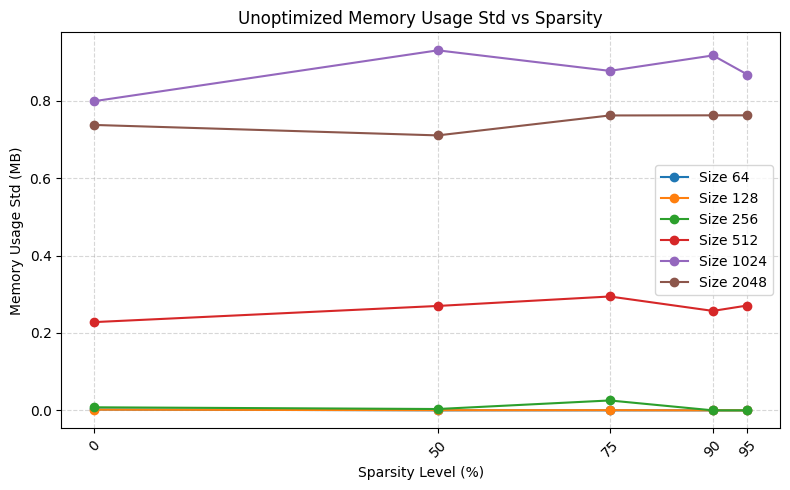

In [90]:
# Filter only unoptimized implementation
df_unopt = agg_df[agg_df['implementation'] == 'unoptimized']

# Sort by matrix size and sparsity for consistent plotting
df_unopt = df_unopt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_unopt['matrix_size'].unique().tolist()
sparsities = df_unopt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size (using std instead of mean)
y_values = []
for size in matrix_sizes:
    subset = df_unopt[df_unopt['matrix_size'] == size]
    y_values.append(subset['memory_usage_mb_std'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Unoptimized Memory Usage Std vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Memory Usage Std (MB)',
    file_name='unoptimized_memory_std_vs_sparsity.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) memory usage (MB): [0.0191, 0.30789999999999995, 1.4274, 7.5144, 41.1648, 143.176]
Unoptimized memory usage (MB): [0.0215, 0.0725, 0.2717, 1.1581, 4.4912, 17.1923]
Plot saved to ./graphs\memory_usage_sparsity0.png


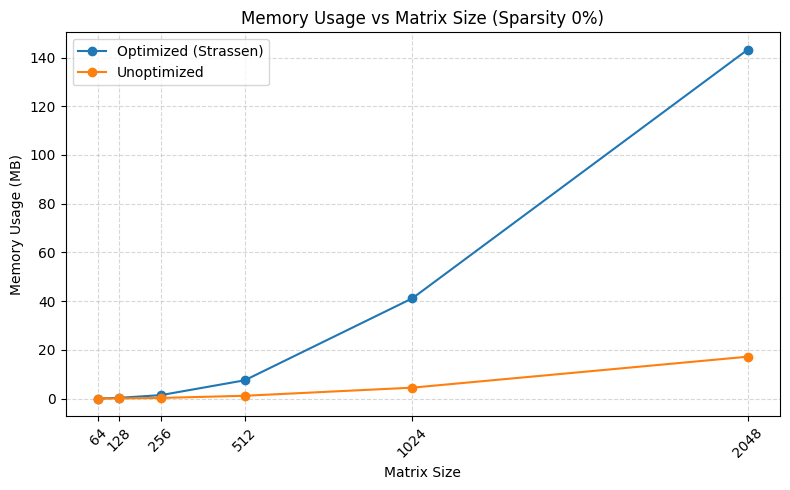

In [91]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size to ensure correct order
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract memory usage
optimized_memory = df_sparsity0[df_sparsity0['implementation'] == 'optimized-strassen']['memory_usage_mb_mean'].tolist()
unoptimized_memory = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['memory_usage_mb_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage (MB):", optimized_memory)
print("Unoptimized memory usage (MB):", unoptimized_memory)

# Plot the memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory, unoptimized_memory],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Memory Usage vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_usage_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) median memory usage (MB): [0.018, 0.308, 1.426, 7.536, 41.1135, 143.1485]
Unoptimized median memory usage (MB): [0.0215, 0.0715, 0.2685, 1.058, 4.117, 16.8885]
Plot saved to ./graphs\median_memory_usage_sparsity0.png


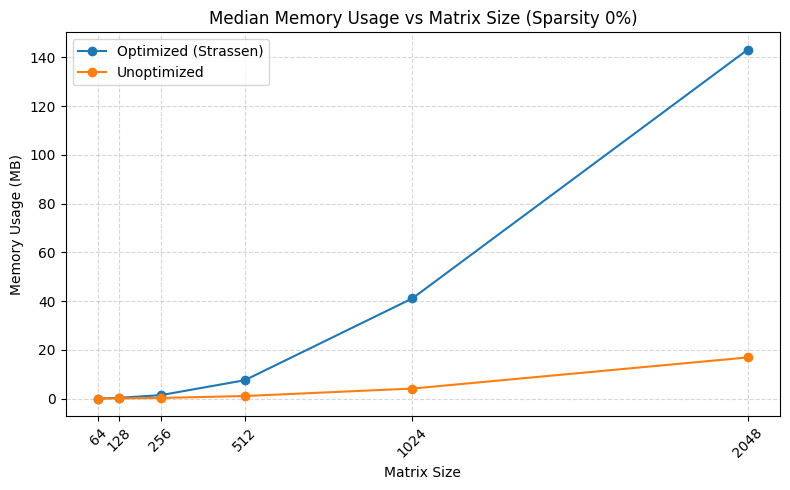

In [92]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size to ensure correct order
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract median memory usage
optimized_memory_median = df_sparsity0[df_sparsity0['implementation'] == 'optimized-strassen']['memory_usage_mb_median'].tolist()
unoptimized_memory_median = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['memory_usage_mb_median'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median memory usage (MB):", optimized_memory_median)
print("Unoptimized median memory usage (MB):", unoptimized_memory_median)

# Plot the median memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory_median, unoptimized_memory_median],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Median Memory Usage vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='median_memory_usage_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) memory usage std (MB): [0.0017288403306519912, 0.0003162277660168543, 0.003777124126457367, 0.5125420741537008, 0.21541732108218026, 0.10116213608745246]
Unoptimized memory usage std (MB): [0.0022730302828309753, 0.001840893502864545, 0.007916929820187728, 0.22805040865757928, 0.7989597125151068, 0.7376449085509312]
Plot saved to ./graphs\memory_usage_std_sparsity0.png


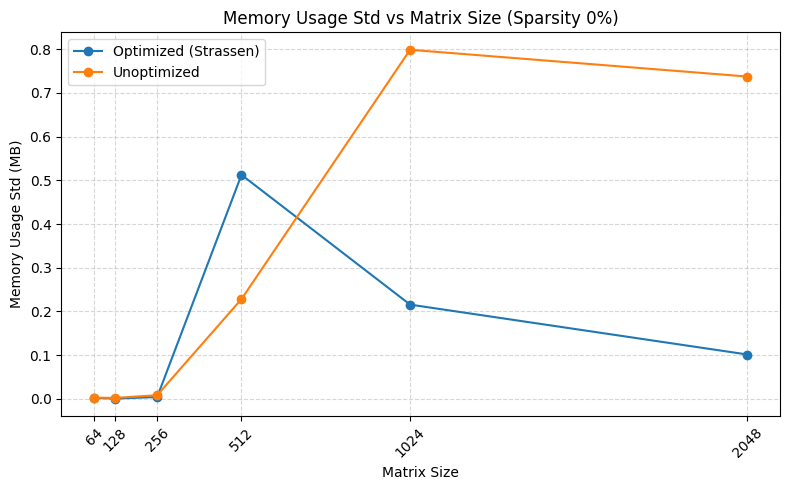

In [93]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size to ensure correct order
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract standard deviation of memory usage
optimized_memory_std = df_sparsity0[df_sparsity0['implementation'] == 'optimized-strassen']['memory_usage_mb_std'].tolist()
unoptimized_memory_std = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['memory_usage_mb_std'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage std (MB):", optimized_memory_std)
print("Unoptimized memory usage std (MB):", unoptimized_memory_std)

# Plot the standard deviation of memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory_std, unoptimized_memory_std],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Memory Usage Std vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_usage_std_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) memory usage: [0.018, 0.308, 1.426, 7.5144, 41.2868, 143.1993]
Unoptimized memory usage: [0.022, 0.0713, 0.2661, 1.1948, 4.6559, 16.9831]
Plot saved to ./graphs\memory_usage_sparsity50.png


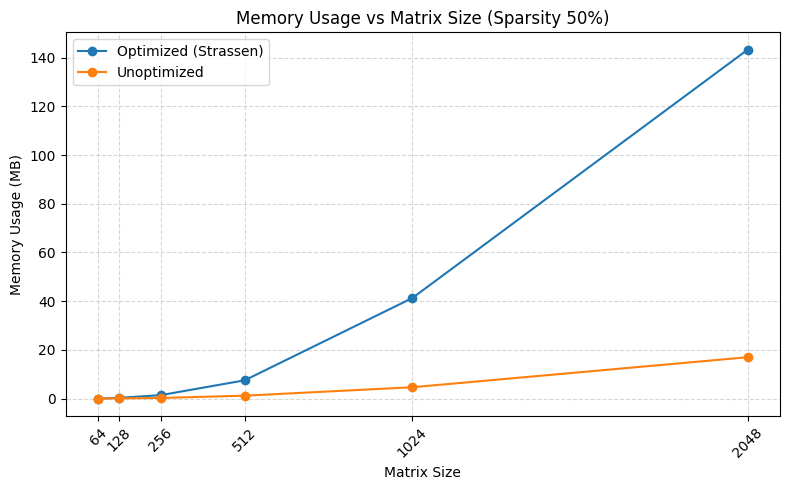

In [94]:
# Filter for sparsity 50
df_sparsity50 = agg_df[agg_df['sparse_level_percent'] == 50]

# Sort by matrix size to ensure correct order
df_sparsity50 = df_sparsity50.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity50['matrix_size'].unique().tolist()

# Extract memory usage
optimized_memory = df_sparsity50[df_sparsity50['implementation'] == 'optimized-strassen']['memory_usage_mb_mean'].tolist()
unoptimized_memory = df_sparsity50[df_sparsity50['implementation'] == 'unoptimized']['memory_usage_mb_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage:", optimized_memory)
print("Unoptimized memory usage:", unoptimized_memory)

# Plot
plot_lines(
    x=sizes,
    y=[optimized_memory, unoptimized_memory],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Memory Usage vs Matrix Size (Sparsity 50%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_usage_sparsity50.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) memory usage (MB, median): [0.018, 0.308, 1.426, 7.536, 41.3245, 143.1405]
Unoptimized memory usage (MB, median): [0.022, 0.071, 0.265, 1.079, 4.086, 16.575499999999998]
Plot saved to ./graphs\memory_usage_sparsity50_median.png


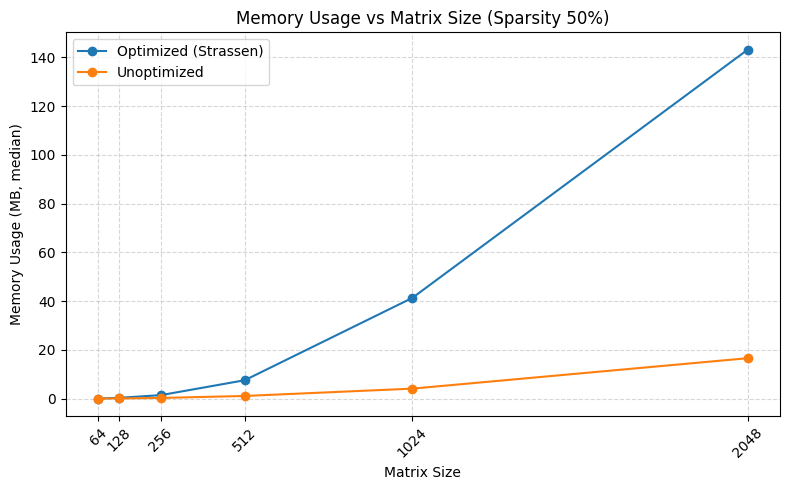

In [95]:
# Filter for sparsity 50
df_sparsity50 = agg_df[agg_df['sparse_level_percent'] == 50]

# Sort by matrix size to ensure correct order
df_sparsity50 = df_sparsity50.sort_values('matrix_size')

# Extract memory usage (median)
optimized_memory_median = df_sparsity50[df_sparsity50['implementation'] == 'optimized-strassen']['memory_usage_mb_median'].tolist()
unoptimized_memory_median = df_sparsity50[df_sparsity50['implementation'] == 'unoptimized']['memory_usage_mb_median'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity50['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage (MB, median):", optimized_memory_median)
print("Unoptimized memory usage (MB, median):", unoptimized_memory_median)

# Plot the memory usage (median)
plot_lines(
    x=sizes,
    y=[optimized_memory_median, unoptimized_memory_median],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Memory Usage vs Matrix Size (Sparsity 50%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB, median)',
    file_name='memory_usage_sparsity50_median.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) memory std (MB): [0.0, 0.0, 0.0, 0.5125420741537009, 0.18372793896290482, 0.12069525444044335]
Unoptimized memory std (MB): [0.0, 0.00048304589153964786, 0.0034785054261852215, 0.2698084917533587, 0.9304482133777127, 0.7106192057322659]
Plot saved to ./graphs\memory_usage_std_sparsity50.png


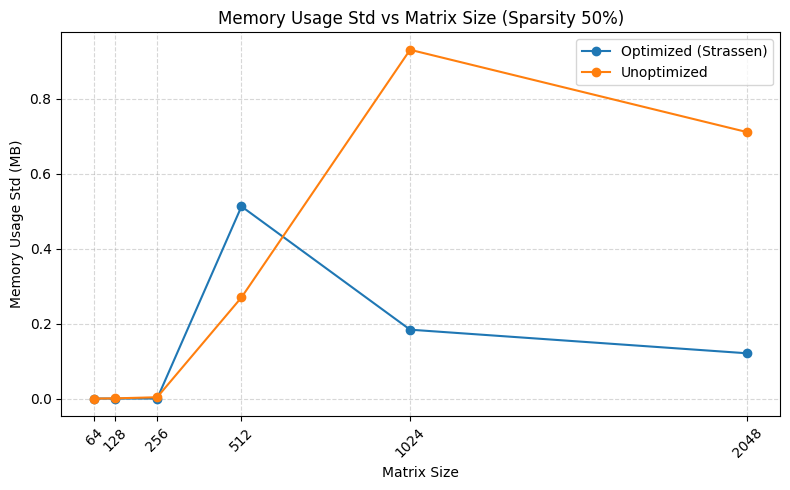

In [96]:
# Filter for sparsity 50
df_sparsity50 = agg_df[agg_df['sparse_level_percent'] == 50]

# Sort by matrix size to ensure correct order
df_sparsity50 = df_sparsity50.sort_values('matrix_size')

# Extract memory usage standard deviation
optimized_memory_std = df_sparsity50[df_sparsity50['implementation'] == 'optimized-strassen']['memory_usage_mb_std'].tolist()
unoptimized_memory_std = df_sparsity50[df_sparsity50['implementation'] == 'unoptimized']['memory_usage_mb_std'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity50['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory std (MB):", optimized_memory_std)
print("Unoptimized memory std (MB):", unoptimized_memory_std)

# Plot the memory usage std
plot_lines(
    x=sizes,
    y=[optimized_memory_std, unoptimized_memory_std],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Memory Usage Std vs Matrix Size (Sparsity 50%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_usage_std_sparsity50.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) memory usage: [0.022, 0.308, 1.4270999999999998, 7.5144, 41.4227, 143.1582]
Unoptimized memory usage: [0.022, 0.0713, 0.2732, 1.2432, 4.824299999999999, 17.1265]
Plot saved to ./graphs\memory_usage_sparsity75.png


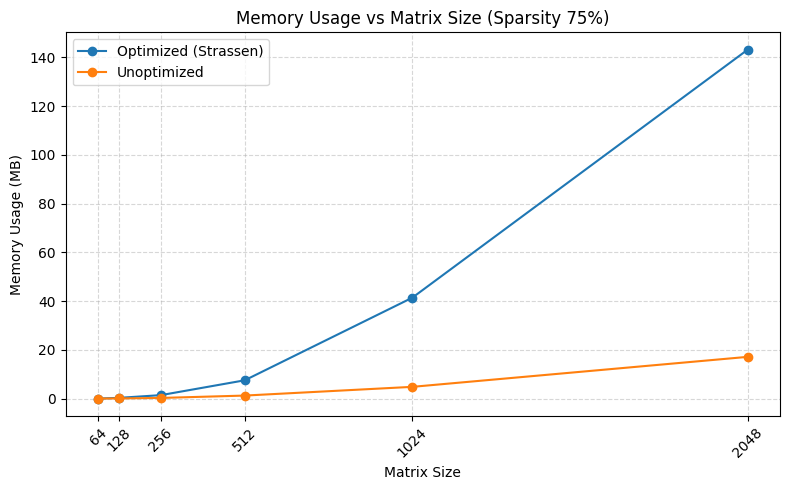

In [97]:
# Filter for sparsity 75
df_sparsity75 = agg_df[agg_df['sparse_level_percent'] == 75]

# Sort by matrix size to ensure correct order
df_sparsity75 = df_sparsity75.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity75['matrix_size'].unique().tolist()

# Extract memory usage
optimized_memory = df_sparsity75[df_sparsity75['implementation'] == 'optimized-strassen']['memory_usage_mb_mean'].tolist()
unoptimized_memory = df_sparsity75[df_sparsity75['implementation'] == 'unoptimized']['memory_usage_mb_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage:", optimized_memory)
print("Unoptimized memory usage:", unoptimized_memory)

# Plot memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory, unoptimized_memory],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Memory Usage vs Matrix Size (Sparsity 75%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_usage_sparsity75.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) median memory usage (MB): [0.018, 0.308, 1.426, 7.536, 41.449, 143.1485]
Unoptimized median memory usage (MB): [0.022, 0.071, 0.265, 1.0835, 4.1985, 16.575499999999998]
Plot saved to ./graphs\median_memory_usage_sparsity75.png


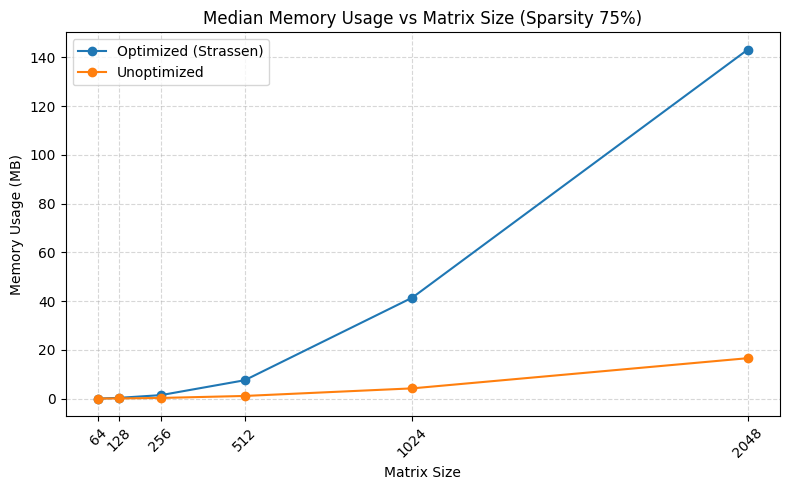

In [98]:
# Filter for sparsity 75
df_sparsity75 = agg_df[agg_df['sparse_level_percent'] == 75]

# Sort by matrix size to ensure correct order
df_sparsity75 = df_sparsity75.sort_values('matrix_size')

# Extract median memory usage
optimized_memory_median = df_sparsity75[df_sparsity75['implementation'] == 'optimized-strassen']['memory_usage_mb_median'].tolist()
unoptimized_memory_median = df_sparsity75[df_sparsity75['implementation'] == 'unoptimized']['memory_usage_mb_median'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity75['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median memory usage (MB):", optimized_memory_median)
print("Unoptimized median memory usage (MB):", unoptimized_memory_median)

# Plot the median memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory_median, unoptimized_memory_median],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Median Memory Usage vs Matrix Size (Sparsity 75%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='median_memory_usage_sparsity75.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) memory usage std (MB): [0.01264911064067352, 0.0, 0.003478505426185257, 0.5125420741537009, 0.17472902830764067, 0.06565871356237647]
Unoptimized memory usage std (MB): [0.0, 0.00048304589153964786, 0.02558558622002282, 0.29429531653312685, 0.8773658871873238, 0.7621588125552027]
Plot saved to ./graphs\memory_usage_std_sparsity75.png


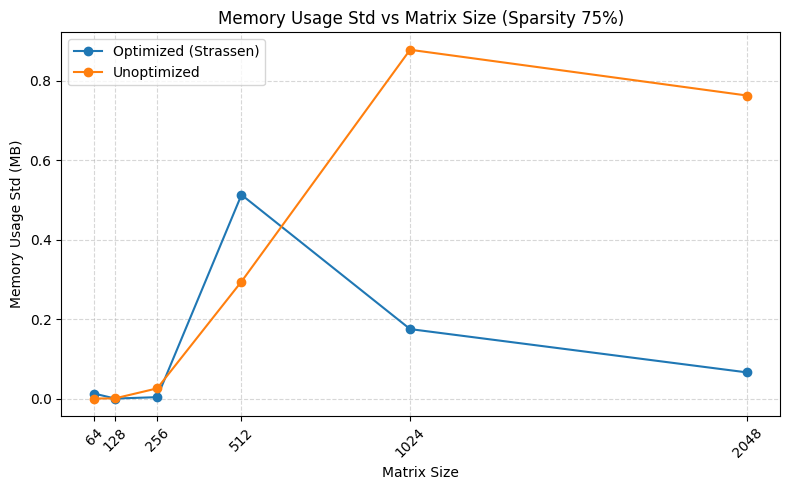

In [99]:
# Filter for sparsity 75
df_sparsity75 = agg_df[agg_df['sparse_level_percent'] == 75]

# Sort by matrix size to ensure correct order
df_sparsity75 = df_sparsity75.sort_values('matrix_size')

# Extract memory usage standard deviation
optimized_memory_std = df_sparsity75[df_sparsity75['implementation'] == 'optimized-strassen']['memory_usage_mb_std'].tolist()
unoptimized_memory_std = df_sparsity75[df_sparsity75['implementation'] == 'unoptimized']['memory_usage_mb_std'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity75['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage std (MB):", optimized_memory_std)
print("Unoptimized memory usage std (MB):", unoptimized_memory_std)

# Plot the memory usage standard deviation
plot_lines(
    x=sizes,
    y=[optimized_memory_std, unoptimized_memory_std],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Memory Usage Std vs Matrix Size (Sparsity 75%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_usage_std_sparsity75.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) memory usage: [0.018, 0.308, 1.426, 7.5287999999999995, 41.3713, 143.2463]
Unoptimized memory usage: [0.022, 0.071, 0.265, 1.2117, 4.8168999999999995, 17.1261]
Plot saved to ./graphs\memory_usage_sparsity90.png


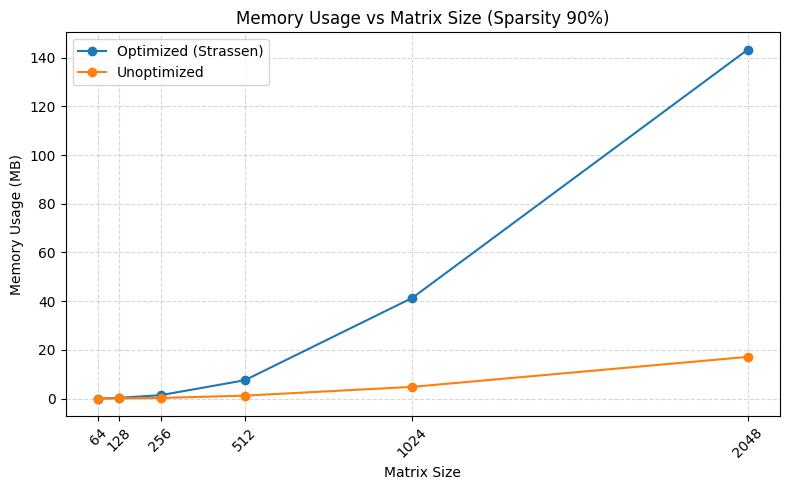

In [100]:
# Filter for sparsity 90
df_sparsity90 = agg_df[agg_df['sparse_level_percent'] == 90]

# Sort by matrix size to ensure correct order
df_sparsity90 = df_sparsity90.sort_values('matrix_size')

# Extract memory usage
optimized_memory = df_sparsity90[df_sparsity90['implementation'] == 'optimized-strassen']['memory_usage_mb_mean'].tolist()
unoptimized_memory = df_sparsity90[df_sparsity90['implementation'] == 'unoptimized']['memory_usage_mb_mean'].tolist()

# Extract matrix sizes
sizes = df_sparsity90['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage:", optimized_memory)
print("Unoptimized memory usage:", unoptimized_memory)

# Plot memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory, unoptimized_memory],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Memory Usage vs Matrix Size (Sparsity 90%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_usage_sparsity90.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) median memory usage (MB): [0.018, 0.308, 1.426, 7.536, 41.449, 143.13850000000002]
Unoptimized median memory usage (MB): [0.022, 0.071, 0.265, 1.0635, 4.15, 16.575499999999998]
Plot saved to ./graphs\median_memory_usage_sparsity90.png


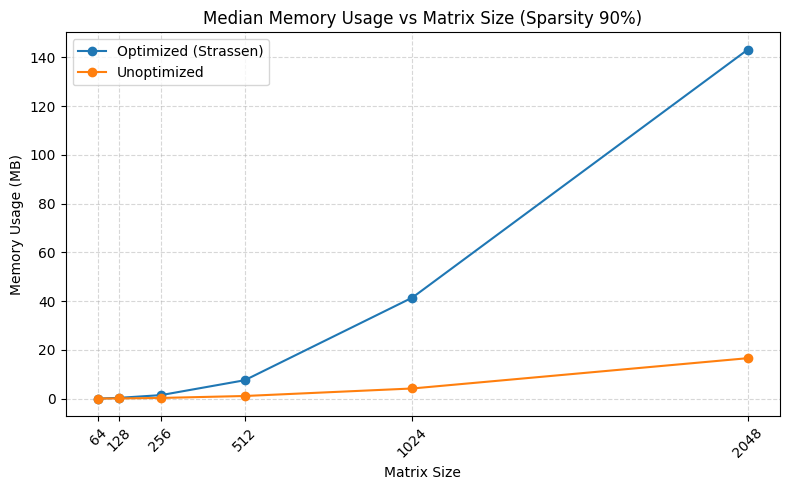

In [101]:
# Filter for sparsity 90
df_sparsity90 = agg_df[agg_df['sparse_level_percent'] == 90]

# Sort by matrix size to ensure correct order
df_sparsity90 = df_sparsity90.sort_values('matrix_size')

# Extract median memory usage
optimized_memory_median = df_sparsity90[df_sparsity90['implementation'] == 'optimized-strassen']['memory_usage_mb_median'].tolist()
unoptimized_memory_median = df_sparsity90[df_sparsity90['implementation'] == 'unoptimized']['memory_usage_mb_median'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity90['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median memory usage (MB):", optimized_memory_median)
print("Unoptimized median memory usage (MB):", unoptimized_memory_median)

# Plot the memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory_median, unoptimized_memory_median],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Median Memory Usage vs Matrix Size (Sparsity 90%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='median_memory_usage_sparsity90.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) memory usage std (MB): [0.0, 0.0, 0.0, 0.4971520670557228, 0.16843531564240113, 0.21149733384187122]
Unoptimized memory usage std (MB): [0.0, 0.0, 0.0, 0.2570179630557626, 0.9172553806510666, 0.7624813950371375]
Plot saved to ./graphs\memory_usage_std_sparsity90.png


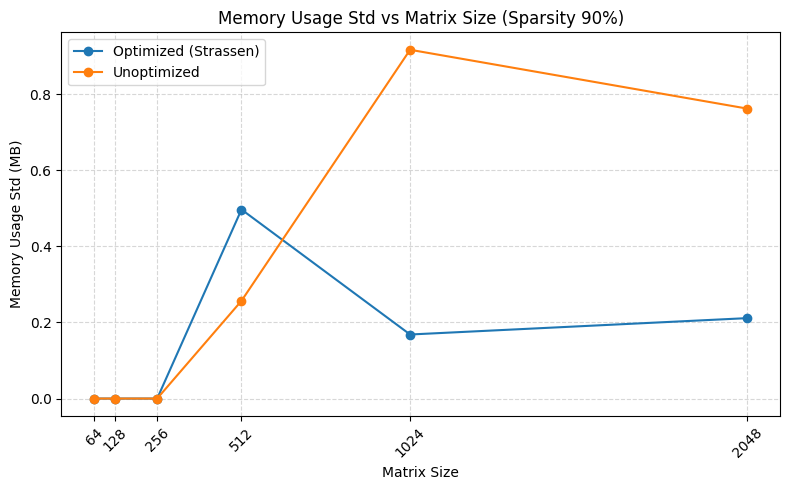

In [102]:
# Filter for sparsity 90
df_sparsity90 = agg_df[agg_df['sparse_level_percent'] == 90]

# Sort by matrix size to ensure correct order
df_sparsity90 = df_sparsity90.sort_values('matrix_size')

# Extract memory usage standard deviation
optimized_memory_std = df_sparsity90[df_sparsity90['implementation'] == 'optimized-strassen']['memory_usage_mb_std'].tolist()
unoptimized_memory_std = df_sparsity90[df_sparsity90['implementation'] == 'unoptimized']['memory_usage_mb_std'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity90['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage std (MB):", optimized_memory_std)
print("Unoptimized memory usage std (MB):", unoptimized_memory_std)

# Plot the memory usage standard deviation
plot_lines(
    x=sizes,
    y=[optimized_memory_std, unoptimized_memory_std],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Memory Usage Std vs Matrix Size (Sparsity 90%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_usage_std_sparsity90.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) memory usage: [0.018, 0.308, 1.426, 7.521599999999999, 41.3232, 143.1705]
Unoptimized memory usage: [0.022, 0.071, 0.265, 1.1960000000000002, 4.801, 17.1261]
Plot saved to ./graphs\memory_usage_sparsity95.png


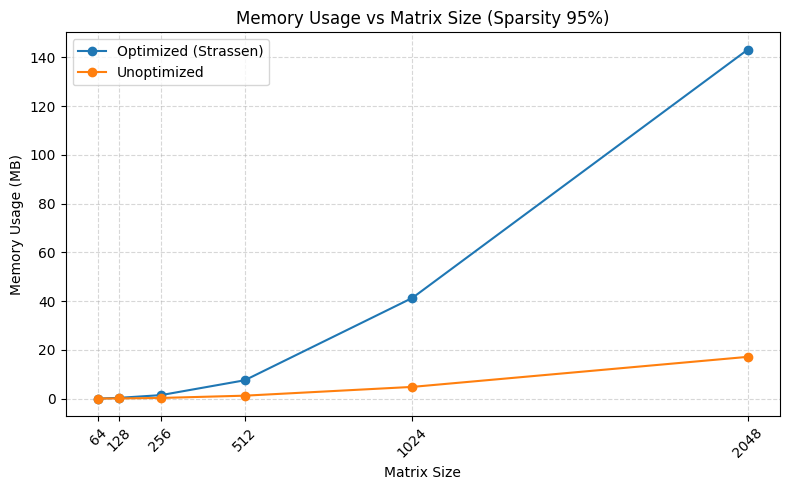

In [103]:
# Filter for sparsity 95
df_sparsity95 = agg_df[agg_df['sparse_level_percent'] == 95]

# Sort by matrix size to ensure correct order
df_sparsity95 = df_sparsity95.sort_values('matrix_size')

# Extract memory usage
optimized_memory = df_sparsity95[df_sparsity95['implementation'] == 'optimized-strassen']['memory_usage_mb_mean'].tolist()
unoptimized_memory = df_sparsity95[df_sparsity95['implementation'] == 'unoptimized']['memory_usage_mb_mean'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity95['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage:", optimized_memory)
print("Unoptimized memory usage:", unoptimized_memory)

# Plot memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory, unoptimized_memory],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Memory Usage vs Matrix Size (Sparsity 95%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_usage_sparsity95.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) median memory usage (MB): [0.018, 0.308, 1.426, 7.536, 41.449, 143.13850000000002]
Unoptimized median memory usage (MB): [0.022, 0.071, 0.265, 1.0870000000000002, 4.181, 16.575499999999998]
Plot saved to ./graphs\median_memory_usage_sparsity95.png


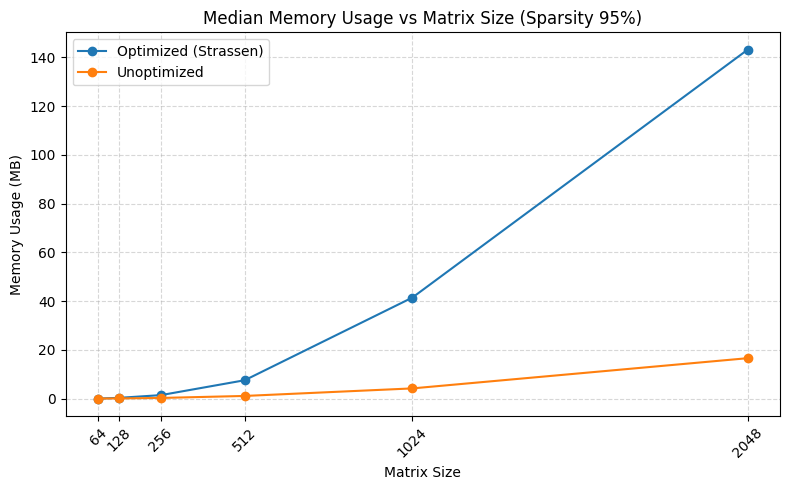

In [104]:
# Filter for sparsity 95
df_sparsity95 = agg_df[agg_df['sparse_level_percent'] == 95]

# Sort by matrix size to ensure correct order
df_sparsity95 = df_sparsity95.sort_values('matrix_size')

# Extract median memory usage
optimized_memory_median = df_sparsity95[df_sparsity95['implementation'] == 'optimized-strassen']['memory_usage_mb_median'].tolist()
unoptimized_memory_median = df_sparsity95[df_sparsity95['implementation'] == 'unoptimized']['memory_usage_mb_median'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity95['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median memory usage (MB):", optimized_memory_median)
print("Unoptimized median memory usage (MB):", unoptimized_memory_median)

# Plot the median memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory_median, unoptimized_memory_median],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Median Memory Usage vs Matrix Size (Sparsity 95%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='median_memory_usage_sparsity95.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized (Strassen) memory usage std (MB): [0.0, 0.0, 0.0, 0.5049627489011221, 0.17503320319934113, 0.09225718881956115]
Unoptimized memory usage std (MB): [0.0, 0.0, 0.0, 0.2709772438170162, 0.8679243438610685, 0.7624813950371364]
Plot saved to ./graphs\memory_usage_std_sparsity95.png


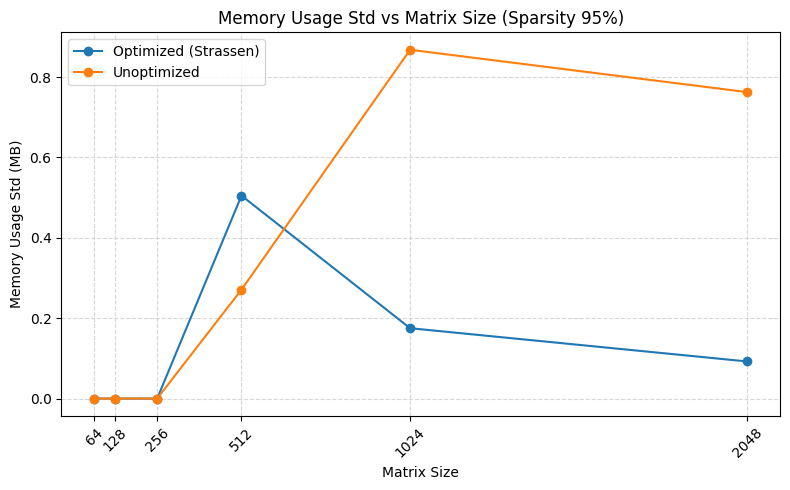

In [105]:
# Filter for sparsity 95
df_sparsity95 = agg_df[agg_df['sparse_level_percent'] == 95]

# Sort by matrix size to ensure correct order
df_sparsity95 = df_sparsity95.sort_values('matrix_size')

# Extract memory usage standard deviation
optimized_memory_std = df_sparsity95[df_sparsity95['implementation'] == 'optimized-strassen']['memory_usage_mb_std'].tolist()
unoptimized_memory_std = df_sparsity95[df_sparsity95['implementation'] == 'unoptimized']['memory_usage_mb_std'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity95['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage std (MB):", optimized_memory_std)
print("Unoptimized memory usage std (MB):", unoptimized_memory_std)

# Plot the memory usage std
plot_lines(
    x=sizes,
    y=[optimized_memory_std, unoptimized_memory_std],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Memory Usage Std vs Matrix Size (Sparsity 95%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_usage_std_sparsity95.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized memory usage (MB): [0.0191, 0.30789999999999995, 1.4274, 7.5144, 41.1648, 143.176]
Theoretical Strassen memory (MB): [np.float64(0.24576000000000003), np.float64(1.1468800000000001), np.float64(5.24288), np.float64(23.59296), np.float64(104.8576), np.float64(461.37344)]
Plot saved to ./graphs\memory_usage_theoretical_sparsity0.png


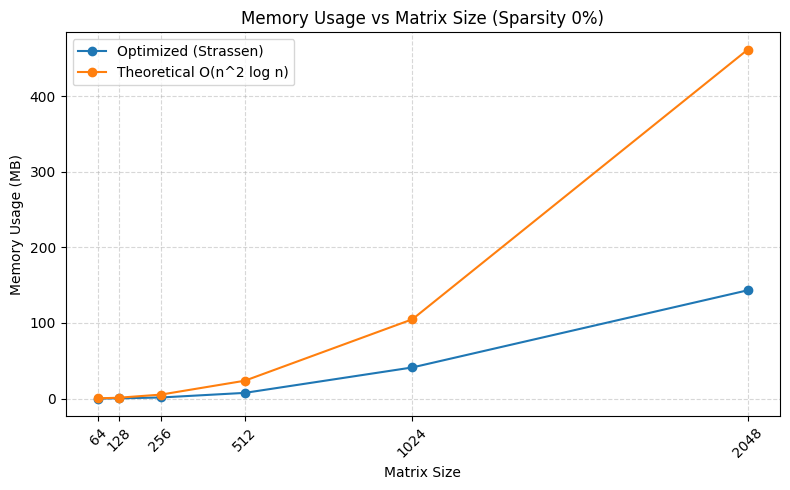

In [106]:
import numpy as np

# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Extract optimized memory usage
optimized_memory = df_sparsity0[df_sparsity0['implementation'] == 'optimized-strassen']['memory_usage_mb_mean'].tolist()

# Compute theoretical Strassen memory: O(n^2 log n)
# Scale factor chosen to roughly match observed memory usage (can adjust)
scale_factor = 1e-5
theoretical_memory = [n**2 * np.log2(n) * scale_factor for n in sizes]

# Print results
print("Matrix sizes:", sizes)
print("Optimized memory usage (MB):", optimized_memory)
print("Theoretical Strassen memory (MB):", theoretical_memory)

# Plot the memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory, theoretical_memory],
    labels=['Optimized (Strassen)', 'Theoretical O(n^2 log n)'],
    title='Memory Usage vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_usage_theoretical_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Optimized execution times (ms): [0.4114, 3.7954999999999997, 20.8591, 153.722, 1117.9698, 7898.6682]
Theoretical Strassen times (ms): [np.float64(117.64900000000003), np.float64(823.5430000000002), np.float64(5764.801000000002), np.float64(40353.60700000002), np.float64(282475.2490000001), np.float64(1977326.743000001)]
Plot saved to ./graphs\execution_time_theoretical_sparsity0.png


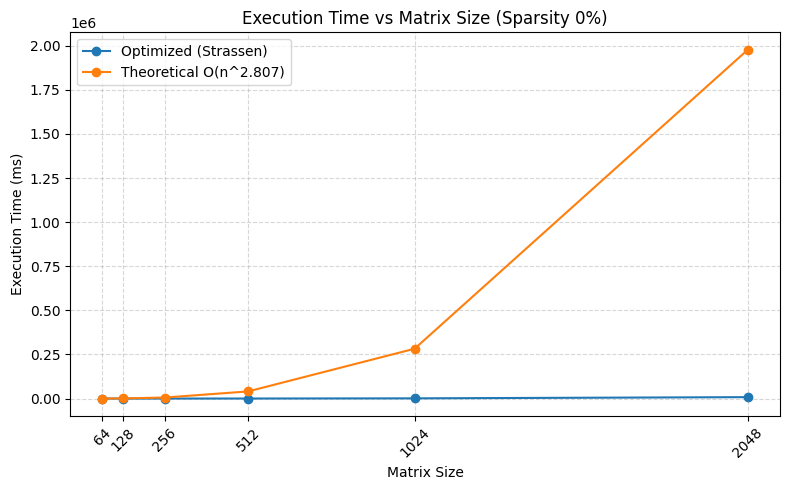

In [107]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Extract optimized execution times
optimized_times = df_sparsity0[df_sparsity0['implementation'] == 'optimized-strassen']['execution_time_ms_mean'].tolist()

# Compute theoretical Strassen time complexity: O(n^log2(7))
# Scale factor chosen to roughly match observed optimized execution times
scale_factor = 1e-3
theoretical_times = [scale_factor * (n ** np.log2(7)) for n in sizes]

# Print results
print("Matrix sizes:", sizes)
print("Optimized execution times (ms):", optimized_times)
print("Theoretical Strassen times (ms):", theoretical_times)

# Plot the execution times
plot_lines(
    x=sizes,
    y=[optimized_times, theoretical_times],
    labels=['Optimized (Strassen)', 'Theoretical O(n^2.807)'],
    title='Execution Time vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='execution_time_theoretical_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Unoptimized execution times (ms): [0.2332, 3.1997, 28.9613, 393.872, 4136.8892, 76819.5566]
Theoretical naive times (ms): [0.262144, 2.097152, 16.777216, 134.217728, 1073.741824, 8589.934592]
Plot saved to ./graphs\execution_time_naive_theoretical_sparsity0.png


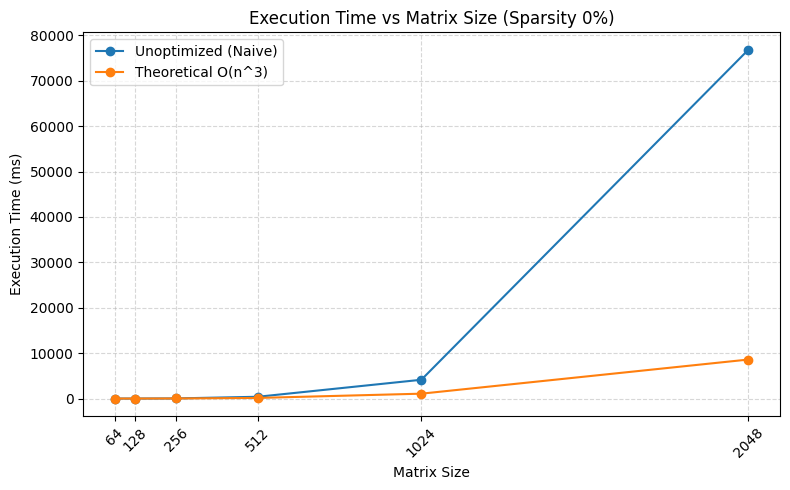

In [108]:
import numpy as np

# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Extract unoptimized execution times
unoptimized_times = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['execution_time_ms_mean'].tolist()

# Compute theoretical naive time complexity: O(n^3)
# Scale factor chosen to roughly match observed unoptimized execution times
scale_factor = 1e-6
theoretical_naive_times = [scale_factor * (n ** 3) for n in sizes]

# Print results
print("Matrix sizes:", sizes)
print("Unoptimized execution times (ms):", unoptimized_times)
print("Theoretical naive times (ms):", theoretical_naive_times)

# Plot the execution times
plot_lines(
    x=sizes,
    y=[unoptimized_times, theoretical_naive_times],
    labels=['Unoptimized (Naive)', 'Theoretical O(n^3)'],
    title='Execution Time vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='execution_time_naive_theoretical_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512, 1024, 2048]
Unoptimized memory usage (MB): [0.0215, 0.0725, 0.2717, 1.1581, 4.4912, 17.1923]
Theoretical naive memory (MB): [4.096, 16.384, 65.536, 262.144, 1048.576, 4194.304]
Plot saved to ./graphs\memory_naive_theoretical_sparsity0.png


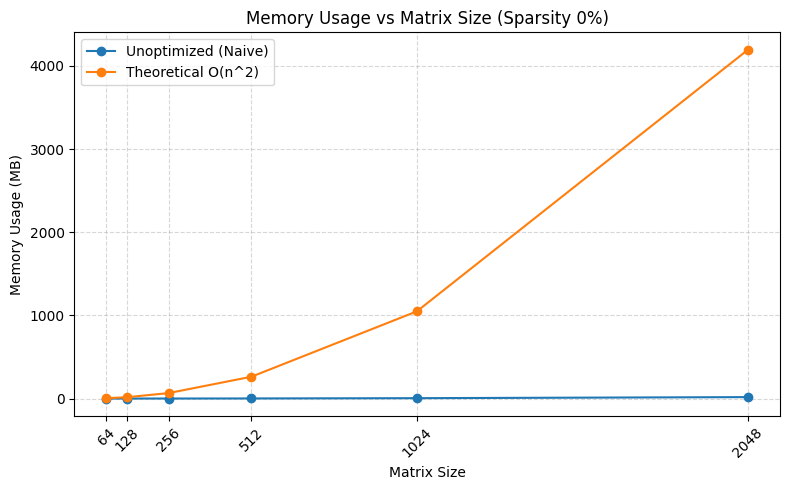

In [109]:
import numpy as np

# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Extract unoptimized memory usage
unoptimized_memory = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['memory_usage_mb_mean'].tolist()

# Compute theoretical naive memory complexity: O(n^2)
# Scale factor chosen to roughly match observed memory usage
scale_factor = 1e-3
theoretical_naive_memory = [scale_factor * (n ** 2) for n in sizes]

# Print results
print("Matrix sizes:", sizes)
print("Unoptimized memory usage (MB):", unoptimized_memory)
print("Theoretical naive memory (MB):", theoretical_naive_memory)

# Plot the memory usage
plot_lines(
    x=sizes,
    y=[unoptimized_memory, theoretical_naive_memory],
    labels=['Unoptimized (Naive)', 'Theoretical O(n^2)'],
    title='Memory Usage vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_naive_theoretical_sparsity0.png',
)
